In [3]:
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'

%matplotlib inline

import csv
import re
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import warnings
from csv_reader import read_csv
from aux import set_smallest_n_zero
from disp import set_font_size, get_ordered_colors
from copy import deepcopy as copy
from analysis_tools import *
from pathlib import Path
from csv_reader import read_csv
from csv_writer import write_csv
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import glob

new_rc_params = {
    'text.usetex': False,
    "svg.fonttype": 'none'
}
matplotlib.rcParams.update(new_rc_params)

plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2.0

warnings.filterwarnings('ignore')

In [4]:
def sort_key(s):
    idx_loc = s.find('INDEX_') + 6
    s_trunc = s[idx_loc:]
    return s_trunc

def plot_param_sweep(file_regex, shape, x_tick_labels=None, y_tick_labels=None, y_label='', x_label='', vmax=1000, scale=1, verbose=False):
    loss_fig, loss_axs = plt.subplots(1, 1, figsize=(3 * scale, 3 * scale), sharex=True, sharey=True)

    all_losses = []
    coefs_matrix = []
    all_sort_keys = []

    for f_idx, file_name in enumerate(sorted(glob.glob(file_regex), key=sort_key)):
        if verbose:
            print(sort_key(file_name))
        all_sort_keys.append(sort_key(file_name))

        loss_data_path = f'{file_name}/train_data.csv'
        loss_data = read_csv(loss_data_path, read_header=False)
        all_losses.append(np.mean(np.array(loss_data[loss_data.columns[2:7]])))
        if verbose:
            print('Loss:', all_losses[-1])


    all_losses = np.array(all_losses).reshape(shape[0], shape[1])
    all_sort_keys = np.array(all_sort_keys).reshape(shape[0], shape[1])
    cbar = loss_axs.matshow(all_losses, vmin=0, vmax=1000, cmap='hot')
    plt.colorbar(cbar, ax=loss_axs)
    loss_axs.set_ylabel(y_label)
    loss_axs.set_xlabel(x_label)

    loss_axs.set_xticks(np.arange(len(x_tick_labels)))
    loss_axs.set_xticklabels([str(l) for l in x_tick_labels], rotation=55, ha='left')
    loss_axs.set_yticks(np.arange(len(y_tick_labels)))
    loss_axs.set_yticklabels([str(l) for l in y_tick_labels])
    
    
#     k_fig.text(0.5, 0.06, 'STDP time const', ha='center')
#     k_fig.text(0.06, 0.5, 'STDP coef', va='center', rotation='vertical')

## Transitions in input parameters

0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.5_T_F_0.005_2024-09-05_16:54:00.715026
0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.5_T_F_0.007_2024-09-05_16:57:27.628316
0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.6_T_F_0.005_2024-09-05_17:00:39.013511
0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.6_T_F_0.007_2024-09-05_17:03:58.761007
0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0

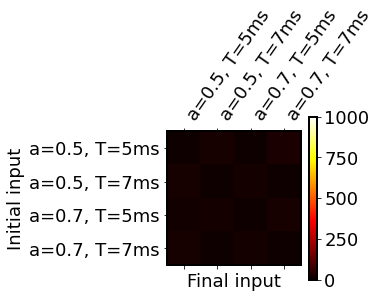

In [3]:
file_regex = './sims_out/2_moment_control_param_sweep_*SEED_2_*_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.5, T=5ms', 'a=0.5, T=7ms', 'a=0.7, T=5ms', 'a=0.7, T=7ms'],
    y_tick_labels=['a=0.5, T=5ms', 'a=0.5, T=7ms', 'a=0.7, T=5ms', 'a=0.7, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
    verbose=True,
)

0__SEED_3_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.5_T_F_0.005_2024-09-05_17:26:18.207722
0__SEED_3_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.5_T_F_0.01_2024-09-05_17:29:29.438778
0__SEED_3_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_1_T_F_0.005_2024-09-05_17:32:52.327151
0__SEED_3_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_1_T_F_0.01_2024-09-05_17:36:21.287733
0__SEED_3_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M

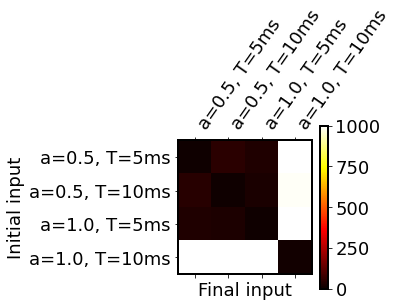

In [5]:
file_regex = './sims_out/2_moment_control_param_sweep_*SEED_3_*_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.5, T=5ms', 'a=0.5, T=10ms', 'a=1.0, T=5ms', 'a=1.0, T=10ms'],
    y_tick_labels=['a=0.5, T=5ms', 'a=0.5, T=10ms', 'a=1.0, T=5ms', 'a=1.0, T=10ms'],
    x_label='Final input',
    y_label='Initial input',
    verbose=True,
)

0__SEED_4_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.3_T_I_0.003_A_F_0.3_T_F_0.003_2024-09-06_11:21:15.460367
Loss: 1030.0785981335773
0__SEED_4_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.3_T_I_0.003_A_F_0.3_T_F_0.007_2024-09-06_11:25:05.337395
Loss: 1030.0785981335773
0__SEED_4_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.3_T_I_0.003_A_F_0.6_T_F_0.003_2024-09-06_11:28:49.232710
Loss: 1030.0785981335773
0__SEED_4_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.3_T_I_0.003_A_F_0.6_T_F_0.007_2024-09-06_11:32:18.232193
Loss: 1030.0785981335773
0__SEED_4_SYN_CHANGE_PROB_0_EXC_RULE_SET

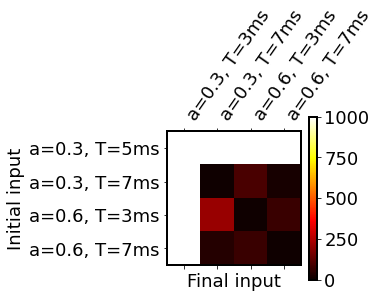

In [3]:
file_regex = './sims_out/2_moment_control_param_sweep_*SEED_4_*_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.3, T=3ms', 'a=0.3, T=7ms', 'a=0.6, T=3ms', 'a=0.6, T=7ms'],
    y_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=3ms', 'a=0.6, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
    verbose=True,
)

### Two moment control

0__SEED_4_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.3_T_I_0.003_A_F_0.3_T_F_0.003_2024-09-06_12:53:19.310367
Loss: 1030.0785981335773
0__SEED_4_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.3_T_I_0.003_A_F_0.3_T_F_0.007_2024-09-06_12:56:35.371788
Loss: 1030.0785981335773
0__SEED_4_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.3_T_I_0.003_A_F_0.6_T_F_0.003_2024-09-06_12:59:58.978228
Loss: 1030.0785981335773
0__SEED_4_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.3_T_I_0.003_A_F_0.6_T_F_0.007_2024-09-06_13:03:28.722661
Loss: 1030.0785981335773
0__SEED_4_SYN_CHANGE_PROB_0_

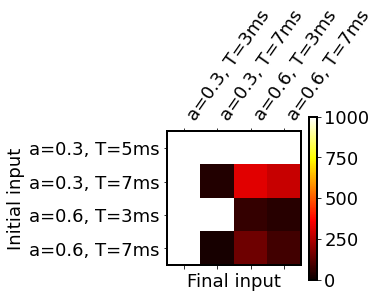

In [12]:
file_regex = './sims_out/2_moment_control_param_sweep_*SEED_4_*_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.3, T=3ms', 'a=0.3, T=7ms', 'a=0.6, T=3ms', 'a=0.6, T=7ms'],
    y_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=3ms', 'a=0.6, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
    verbose=True,
)

0__SEED_4_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.01_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.3_T_I_0.003_A_F_0.3_T_F_0.003_2024-09-06_13:27:29.548162
Loss: 1030.0785981335773
0__SEED_4_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.01_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.3_T_I_0.003_A_F_0.3_T_F_0.007_2024-09-06_13:31:42.642001
Loss: 1030.0785981335773
0__SEED_4_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.01_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.3_T_I_0.003_A_F_0.6_T_F_0.003_2024-09-06_13:35:55.660921
Loss: 1030.0785981335773
0__SEED_4_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.01_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.3_T_I_0.003_A_F_0.6_T_F_0.007_2024-09-06_13:40:24.240872
Loss: 1030.0785981335773
0__SEED_4_SYN_CHANGE_PROB_0_

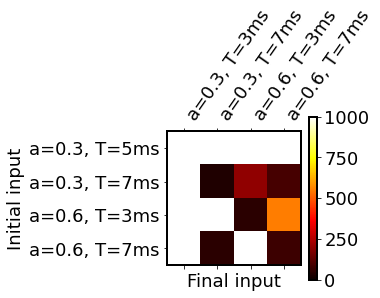

In [6]:
file_regex = './sims_out/2_moment_control_param_sweep_*SEED_4_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.01_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.3, T=3ms', 'a=0.3, T=7ms', 'a=0.6, T=3ms', 'a=0.6, T=7ms'],
    y_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=3ms', 'a=0.6, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
    verbose=True,
)

0__SEED_4_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.3_T_I_0.003_A_F_0.3_T_F_0.003_2024-09-06_13:48:22.261737
Loss: 1030.0785981335773
0__SEED_4_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.3_T_I_0.003_A_F_0.3_T_F_0.007_2024-09-06_13:52:29.136970
Loss: 1030.0785981335773
0__SEED_4_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.3_T_I_0.003_A_F_0.6_T_F_0.003_2024-09-06_13:56:52.966932
Loss: 1030.0785981335773
0__SEED_4_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.3_T_I_0.003_A_F_0.6_T_F_0.007_2024-09-06_14:01:24.444806
Loss: 1030.0785981335773
0__SEED_4_SYN_CHANGE_PROB_0_EXC_

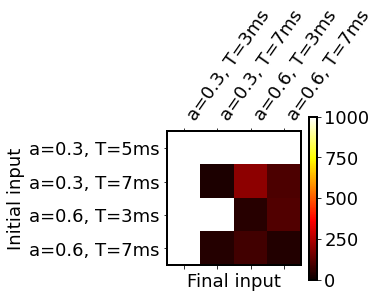

In [7]:
file_regex = './sims_out/2_moment_control_param_sweep_*SEED_4_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.3, T=3ms', 'a=0.3, T=7ms', 'a=0.6, T=3ms', 'a=0.6, T=7ms'],
    y_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=3ms', 'a=0.6, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
    verbose=True,
)

ValueError: cannot reshape array of size 0 into shape (4,4)

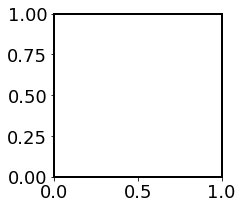

In [9]:
file_regex = './sims_out/2_moment_control_param_sweep_*SEED_4_*_EXC_RULE_SETPOINT_1.0_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.3, T=3ms', 'a=0.3, T=7ms', 'a=0.6, T=3ms', 'a=0.6, T=7ms'],
    y_tick_labels=['a=0.3, T=5ms', 'a=0.3, T=7ms', 'a=0.6, T=3ms', 'a=0.6, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
    verbose=True,
)

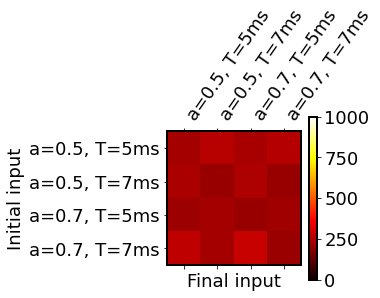

In [29]:
file_regex = './sims_out/2_moment_control_param_sweep_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.2_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.5, T=5ms', 'a=0.5, T=7ms', 'a=0.7, T=5ms', 'a=0.7, T=7ms'],
    y_tick_labels=['a=0.5, T=5ms', 'a=0.5, T=7ms', 'a=0.7, T=5ms', 'a=0.7, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
)

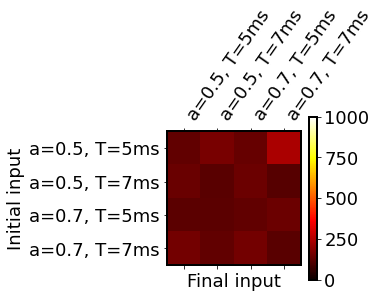

In [30]:
file_regex = './sims_out/2_moment_control_param_sweep_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.3_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.5, T=5ms', 'a=0.5, T=7ms', 'a=0.7, T=5ms', 'a=0.7, T=7ms'],
    y_tick_labels=['a=0.5, T=5ms', 'a=0.5, T=7ms', 'a=0.7, T=5ms', 'a=0.7, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
)

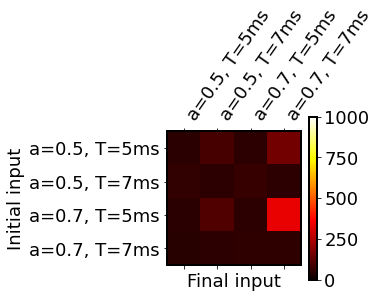

In [31]:
file_regex = './sims_out/2_moment_control_param_sweep_*SEED_1*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.5, T=5ms', 'a=0.5, T=7ms', 'a=0.7, T=5ms', 'a=0.7, T=7ms'],
    y_tick_labels=['a=0.5, T=5ms', 'a=0.5, T=7ms', 'a=0.7, T=5ms', 'a=0.7, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
)

### Second moment on excitatory synapses

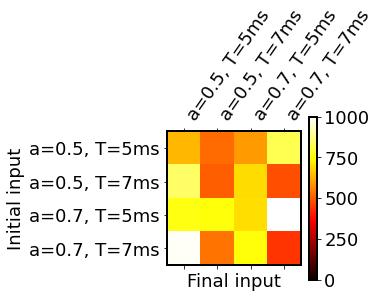

In [32]:
file_regex = './sims_out/2_moment_control_param_sweep_*SEED_1_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.5, T=5ms', 'a=0.5, T=7ms', 'a=0.7, T=5ms', 'a=0.7, T=7ms'],
    y_tick_labels=['a=0.5, T=5ms', 'a=0.5, T=7ms', 'a=0.7, T=5ms', 'a=0.7, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
)

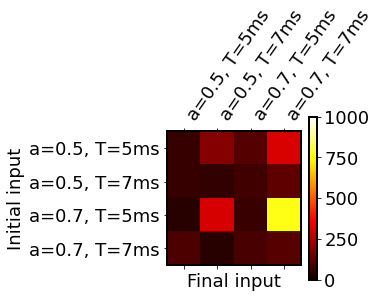

In [33]:
file_regex = './sims_out/2_moment_control_param_sweep_*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.06_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.5, T=5ms', 'a=0.5, T=7ms', 'a=0.7, T=5ms', 'a=0.7, T=7ms'],
    y_tick_labels=['a=0.5, T=5ms', 'a=0.5, T=7ms', 'a=0.7, T=5ms', 'a=0.7, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
)

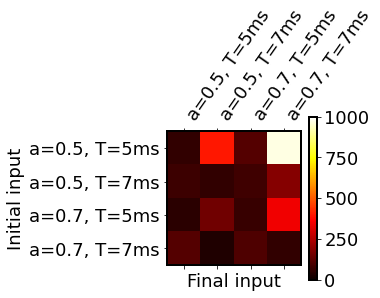

In [34]:
file_regex = './sims_out/2_moment_control_param_sweep_*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.5, T=5ms', 'a=0.5, T=7ms', 'a=0.7, T=5ms', 'a=0.7, T=7ms'],
    y_tick_labels=['a=0.5, T=5ms', 'a=0.5, T=7ms', 'a=0.7, T=5ms', 'a=0.7, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
)

### First moment on excitatory synapses

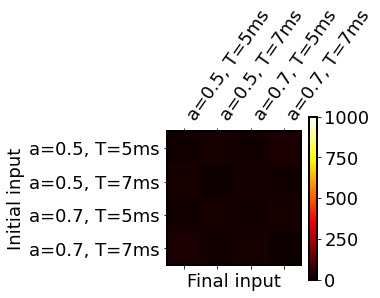

In [39]:
file_regex = './sims_out/2_moment_control_param_sweep_*SEED_2_*_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0.001_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_1_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.5, T=5ms', 'a=0.5, T=7ms', 'a=0.7, T=5ms', 'a=0.7, T=7ms'],
    y_tick_labels=['a=0.5, T=5ms', 'a=0.5, T=7ms', 'a=0.7, T=5ms', 'a=0.7, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
)

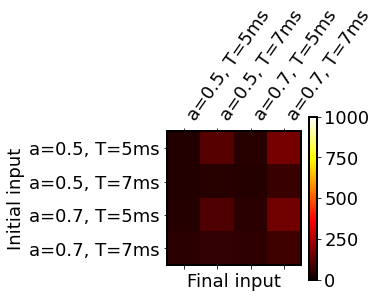

In [40]:
file_regex = './sims_out/2_moment_control_param_sweep_*SEED_2_*_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0.01_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_1_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.5, T=5ms', 'a=0.5, T=7ms', 'a=0.7, T=5ms', 'a=0.7, T=7ms'],
    y_tick_labels=['a=0.5, T=5ms', 'a=0.5, T=7ms', 'a=0.7, T=5ms', 'a=0.7, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
)

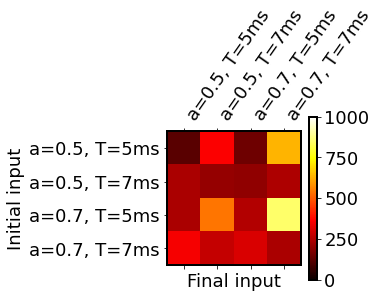

In [47]:
file_regex = './sims_out/2_moment_control_param_sweep*_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_1_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_*'
plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.5, T=5ms', 'a=0.5, T=7ms', 'a=0.7, T=5ms', 'a=0.7, T=7ms'],
    y_tick_labels=['a=0.5, T=5ms', 'a=0.5, T=7ms', 'a=0.7, T=5ms', 'a=0.7, T=7ms'],
    x_label='Final input',
    y_label='Initial input',
)

In [4]:
def find_batch_num(name):
    idx = name.find('batch')
    trimmed_name = name[idx + 6:]
    idx_underscore = trimmed_name.find('_')
    trimmed_name = trimmed_name[:idx_underscore]
    return int(trimmed_name)

def find_trial_num(name):
    idx = name.find('trial')
    trimmed_name = name[idx + 6:]
    idx_underscore = trimmed_name.find('.')
    trimmed_name = trimmed_name[:idx_underscore]
    return int(trimmed_name)

def plot_activities(dir_name, idx_dir):
    scale = 1
    fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 7 * scale), sharex=True, sharey=True)
    
    ic_labels=['a=0.5, T=5ms', 'a=0.5, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms']
    fc_labels=['a=0.5, T=5ms', 'a=0.5, T=7ms', 'a=0.6, T=5ms', 'a=0.6, T=7ms']
    
    file_regex = os.path.join(dir_name, 'all_r_0_batch_0_trial_*')
    print(dir_name)
    print(idx_dir % len(ic_labels))
    print(ic_labels[int(idx_dir / len(ic_labels))], r'$\rightarrow$', fc_labels[idx_dir % len(ic_labels)])

    initial_activations = []
    final_activations = []

    for file_path in glob.glob(file_regex):

        batch_num = find_batch_num(file_path)
        trial_num = find_trial_num(file_path)

        r = read_csv(file_path, read_header=False)

        if trial_num < 10:
            initial_activations.append(r)
        else:
            final_activations.append(r)

    mean_initial = np.array(initial_activations)
    mean_initial = mean_initial.mean(axis=0)

    mean_final = np.array(final_activations)
    mean_final = mean_final.mean(axis=0)

    if len(mean_initial.shape) > 1:
        n_lines = mean_initial.shape[1]
        cmap = matplotlib.colormaps['plasma']
        colors = cmap(np.linspace(0, 1, n_lines))

        for n_idx in reversed(np.arange(20)):
            axs.plot(np.arange(mean_initial.shape[0]) * 0.1, 0.2 * n_idx + mean_initial[:, n_idx], '--', c=colors[n_idx])
            axs.plot(np.arange(mean_final.shape[0]) * 0.1, 0.2 * n_idx + mean_final[:, n_idx], c=colors[n_idx])
        axs.set_xlabel('Time (ms)')
        axs.set_ylabel('Firing rate')
        axs.set_yticks([])
        axs.set_title(ic_labels[int(idx_dir / len(ic_labels))] + r'$\rightarrow$' + fc_labels[idx_dir % len(ic_labels)])

#         axs.set_xlim(0, 1000)



./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.5_T_F_0.005_2024-09-03_12:57:21.676076
0
a=0.5, T=5ms $\rightarrow$ a=0.5, T=5ms
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.5_T_F_0.007_2024-09-03_13:01:51.839944
1
a=0.5, T=5ms $\rightarrow$ a=0.5, T=7ms
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.6_T_F_0.005_2024-09-03_13:06:19.809440
2
a=0.5, T=5ms $\rightarrow$ a=0.6, T=5ms
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE

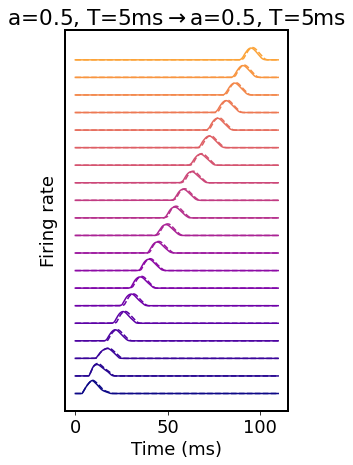

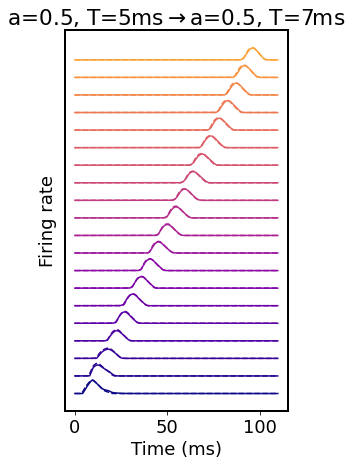

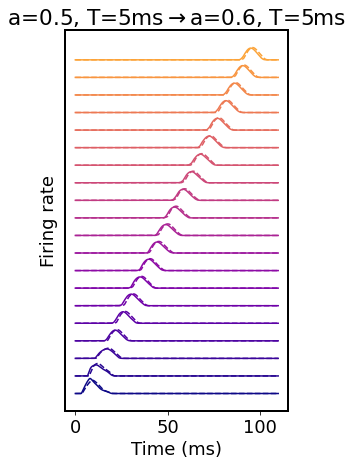

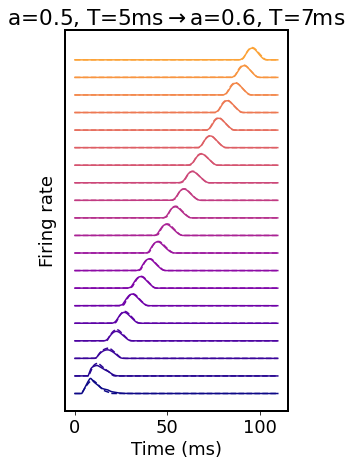

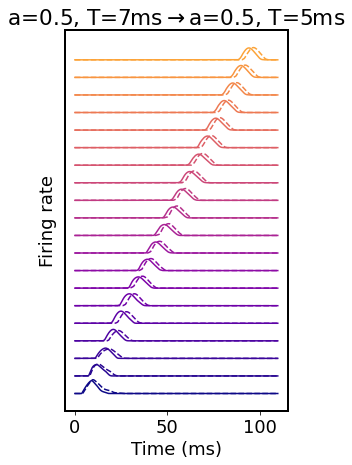

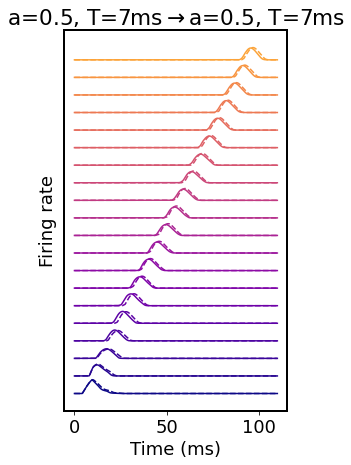

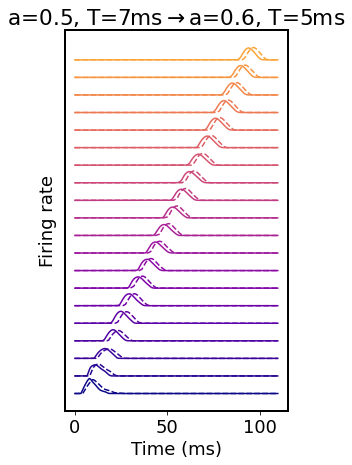

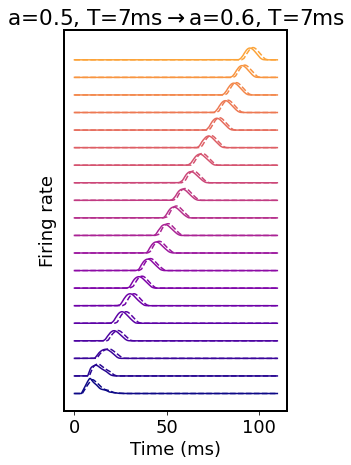

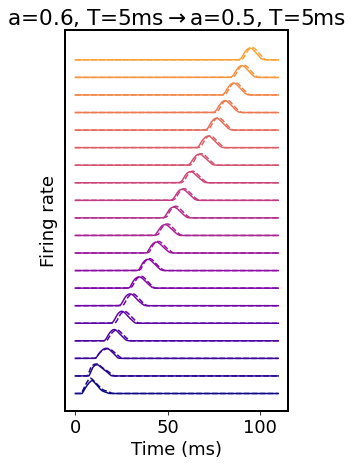

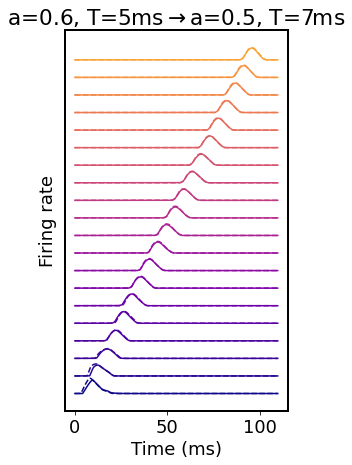

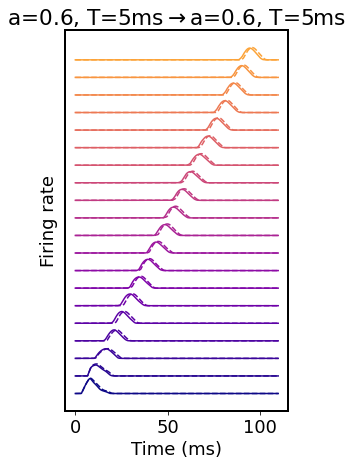

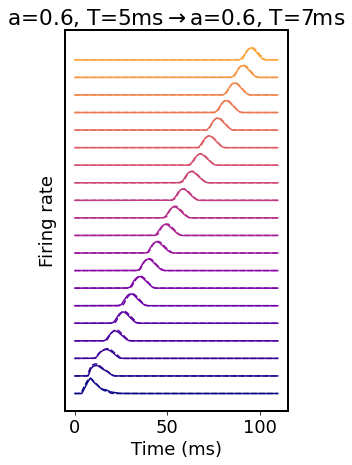

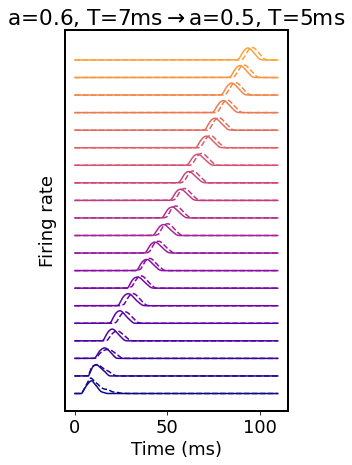

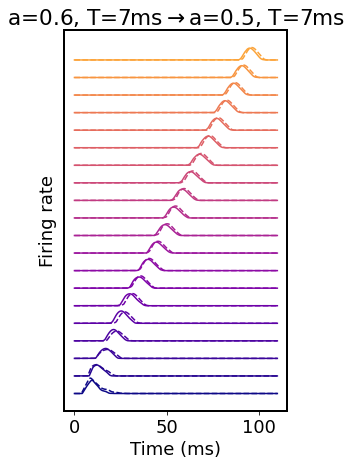

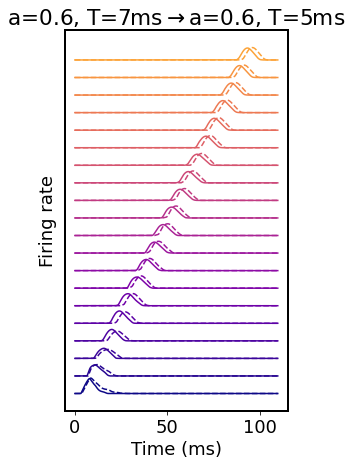

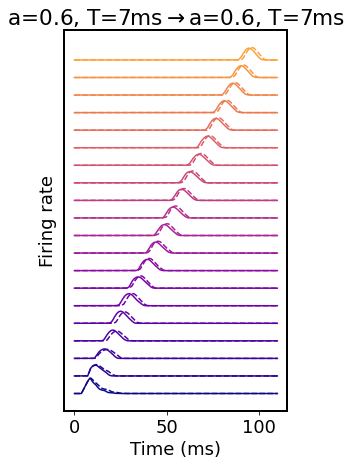

In [49]:
for idx_dir, dir_name in enumerate(sorted(glob.glob('./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'))):
    plot_activities(dir_name, idx_dir)

./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.5_T_F_0.005_2024-09-03_14:25:21.508098
0
a=0.5, T=5ms $\rightarrow$ a=0.5, T=5ms
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.5_T_F_0.007_2024-09-03_14:29:37.526694
1
a=0.5, T=5ms $\rightarrow$ a=0.5, T=7ms
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.6_T_F_0.005_2024-09-03_14:34:03.553519
2
a=0.5, T=5ms $\rightarrow$ a=0.6, T=5ms
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE

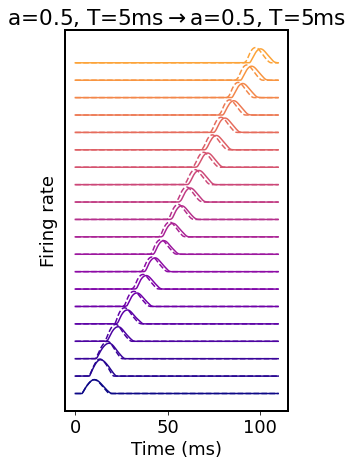

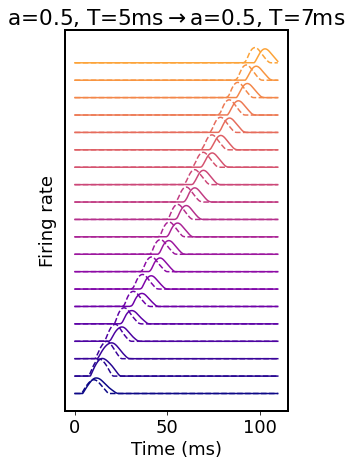

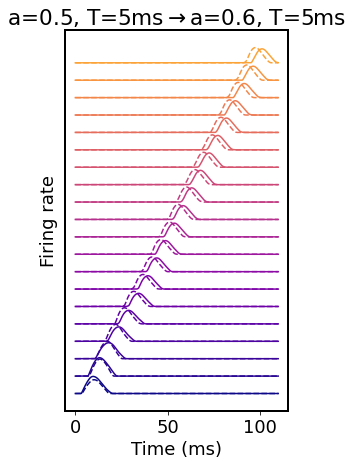

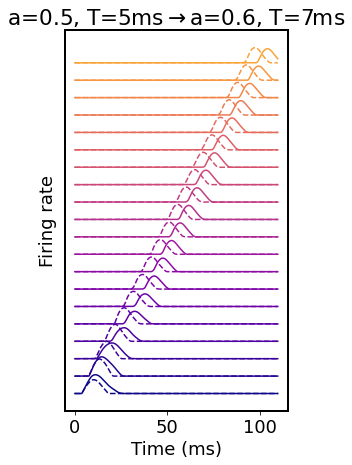

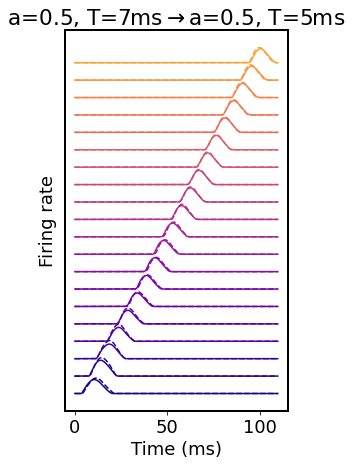

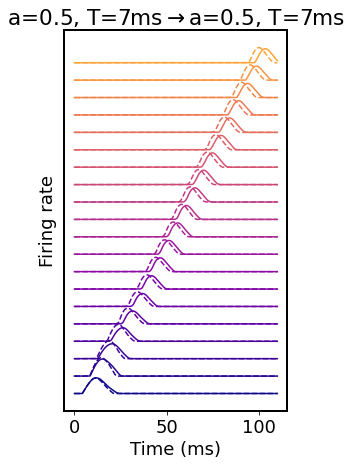

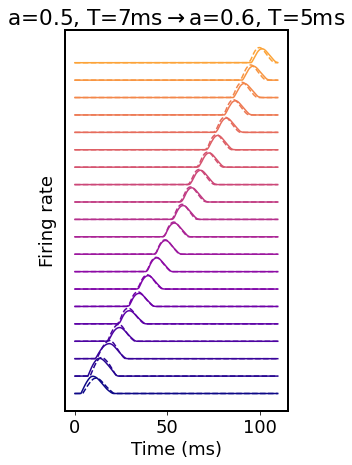

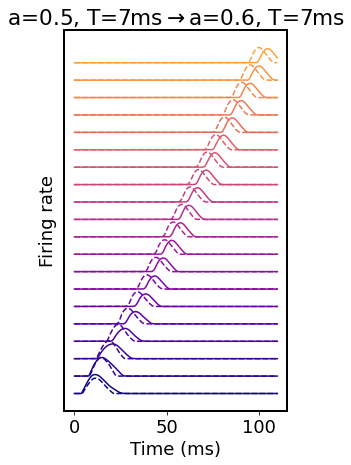

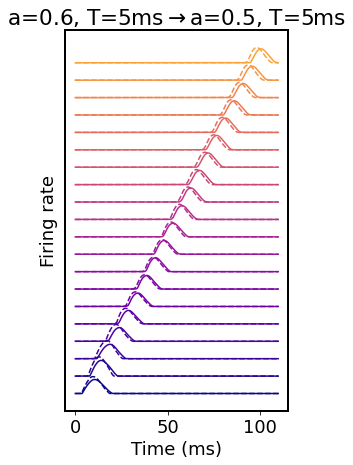

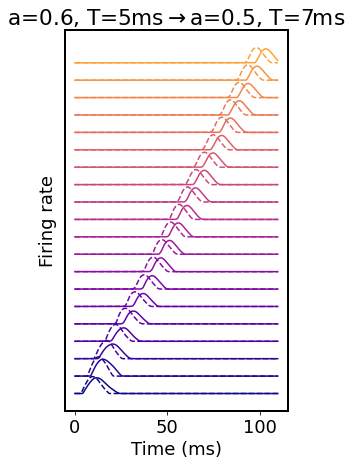

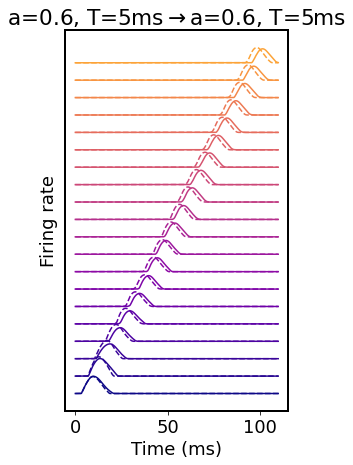

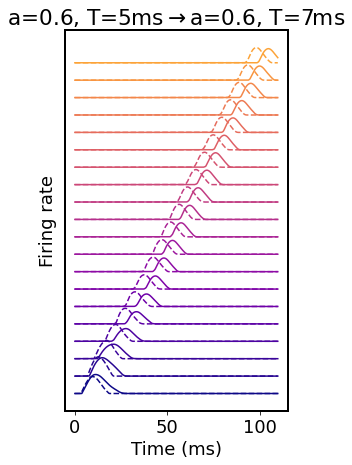

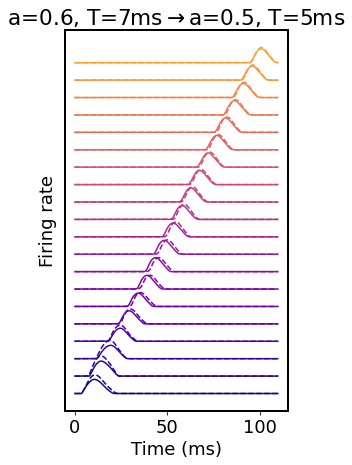

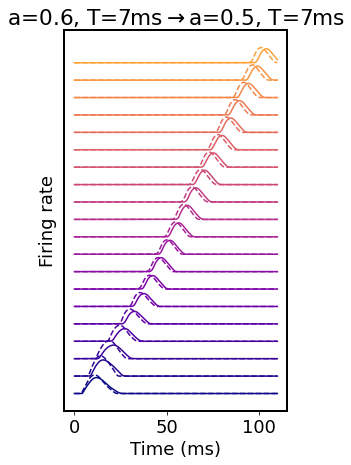

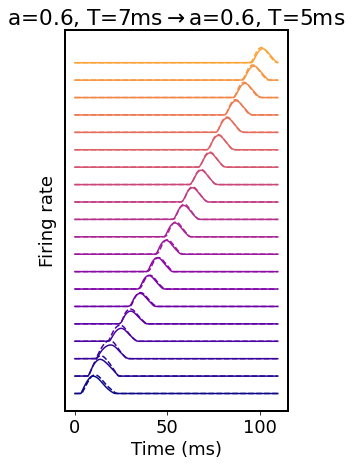

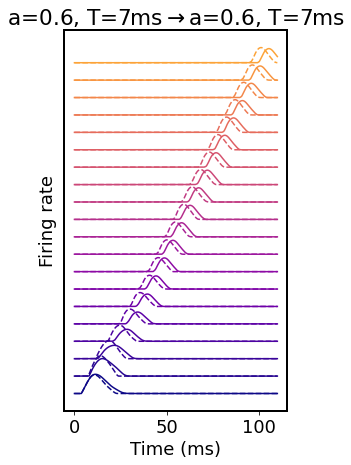

In [50]:
for idx_dir, dir_name in enumerate(sorted(glob.glob('./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.03_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'))):
    plot_activities(dir_name, idx_dir)

./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.2_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.5_T_F_0.005_2024-09-03_23:26:40.742010
0
a=0.5, T=5ms $\rightarrow$ a=0.5, T=5ms
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.2_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.5_T_F_0.007_2024-09-03_23:31:17.348176
1
a=0.5, T=5ms $\rightarrow$ a=0.5, T=7ms
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.2_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.6_T_F_0.005_2024-09-03_23:35:55.043904
2
a=0.5, T=5ms $\rightarrow$ a=0.6, T=5ms
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SE

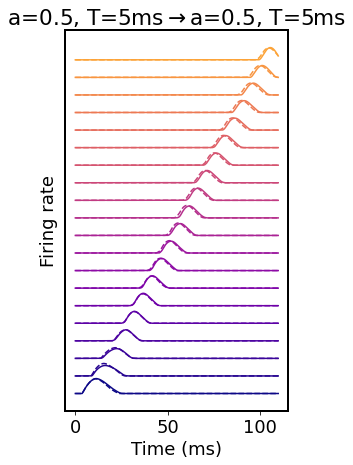

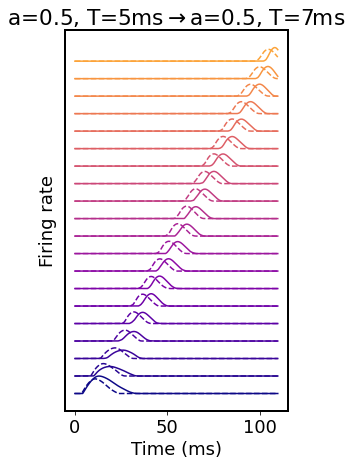

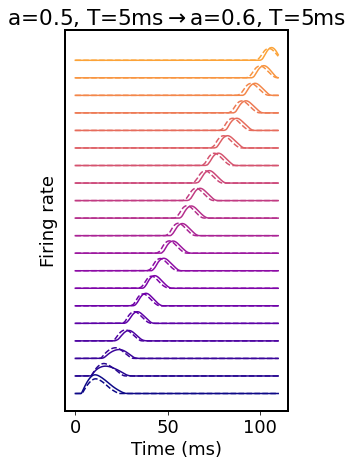

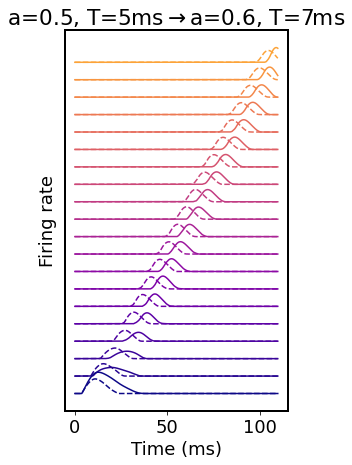

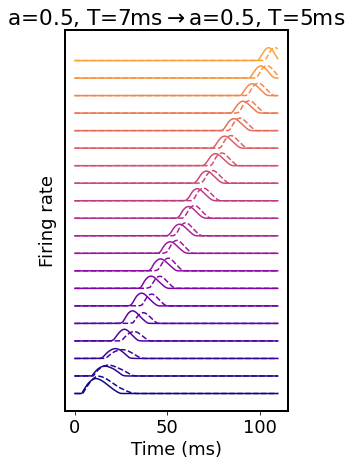

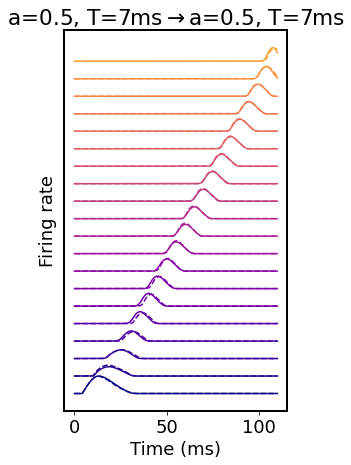

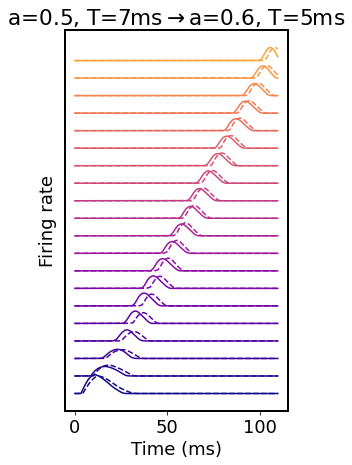

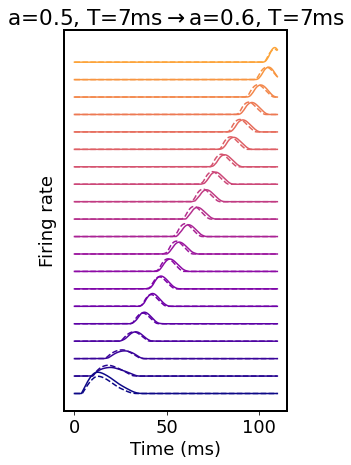

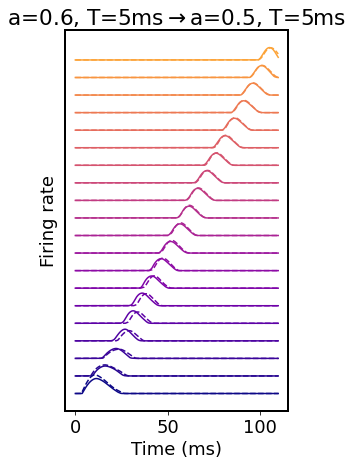

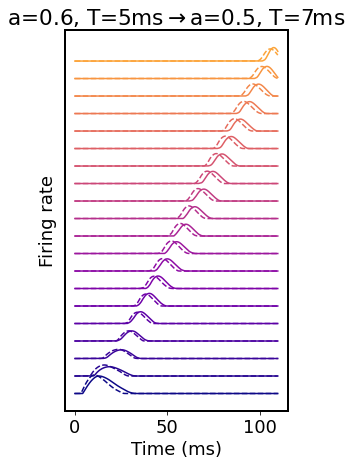

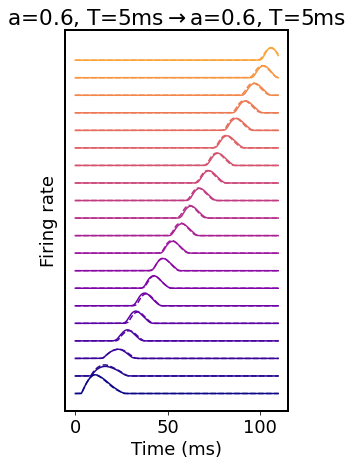

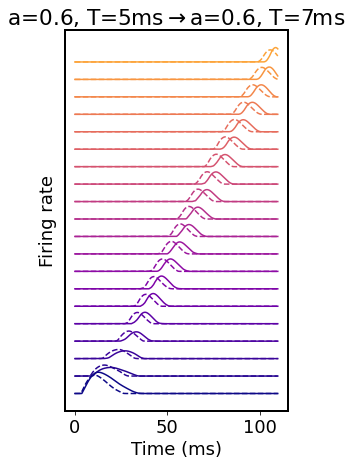

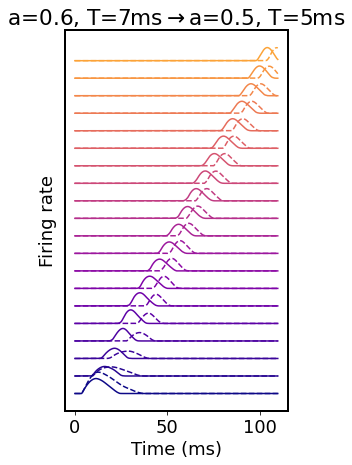

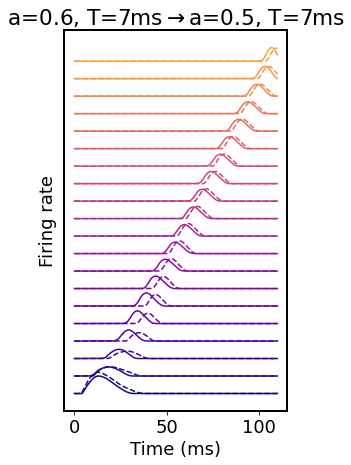

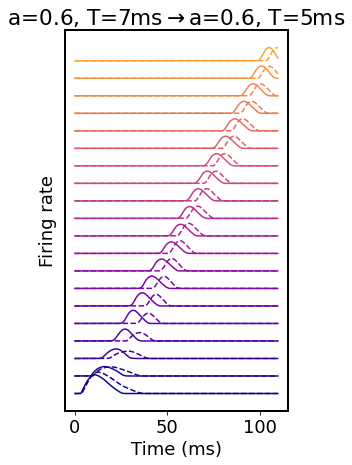

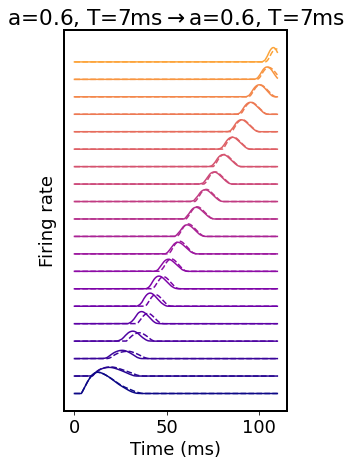

In [51]:
for idx_dir, dir_name in enumerate(sorted(glob.glob('./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.2_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'))):
    plot_activities(dir_name, idx_dir)

./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0.001_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_1_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.5_T_F_0.005_2024-09-04_14:31:57.371752
0
a=0.5, T=5ms $\rightarrow$ a=0.5, T=5ms
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0.001_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_1_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.5_T_F_0.007_2024-09-04_14:36:18.906753
1
a=0.5, T=5ms $\rightarrow$ a=0.5, T=7ms
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0.001_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_1_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.6_T_F_0.005_2024-09-04_14:40:36.295749
2
a=0.5, T=5ms $\rightarrow$ a=0.6, T=5ms
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_2_SYN_CHANGE_PROB_0_EXC_R

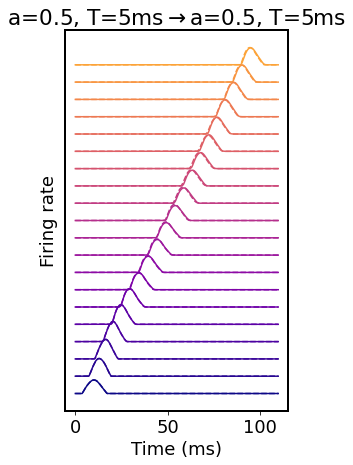

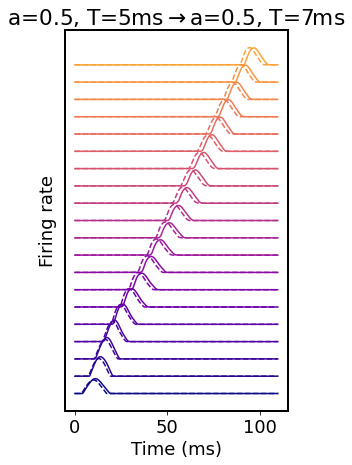

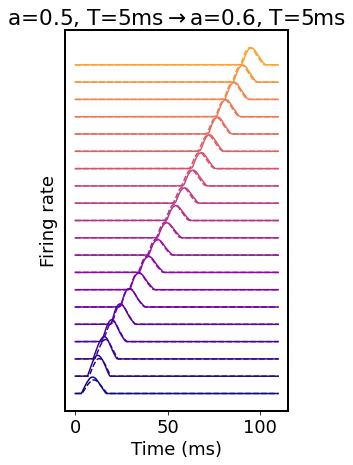

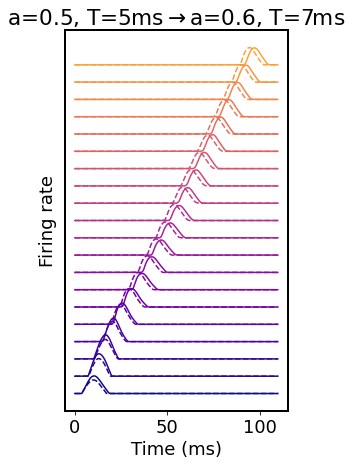

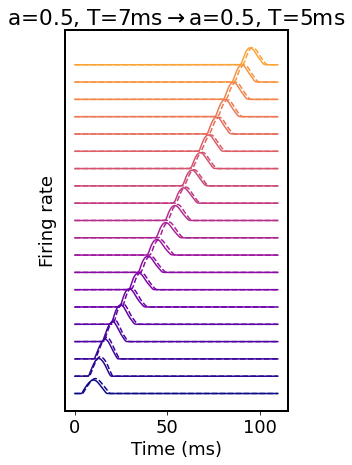

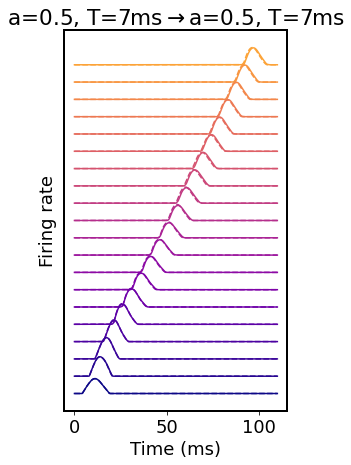

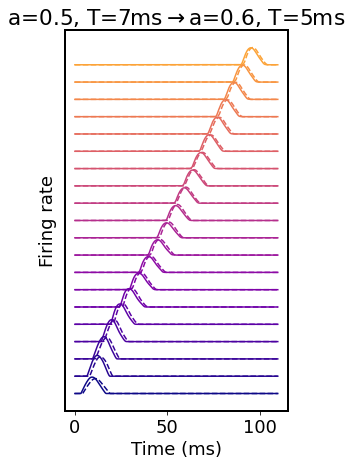

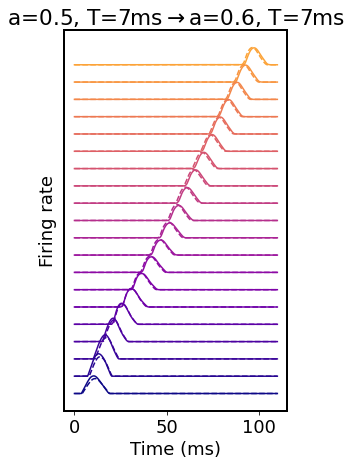

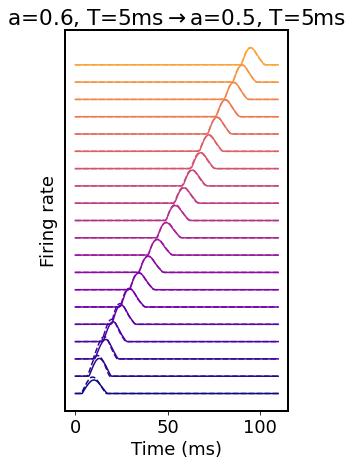

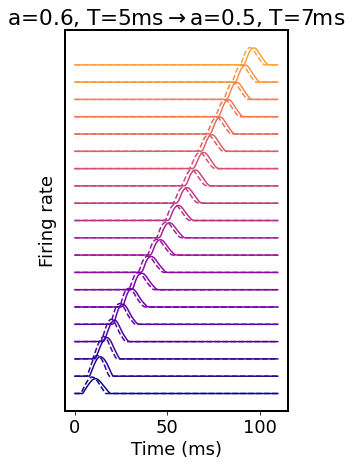

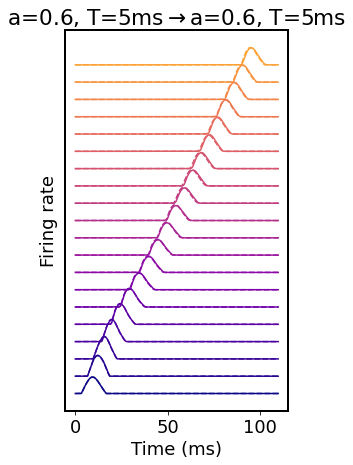

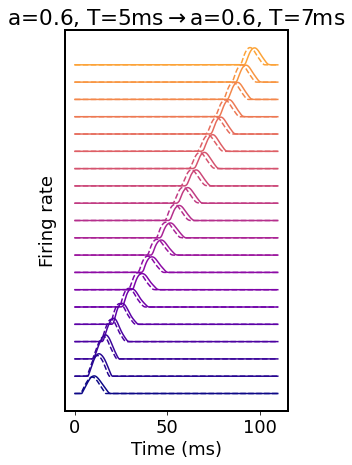

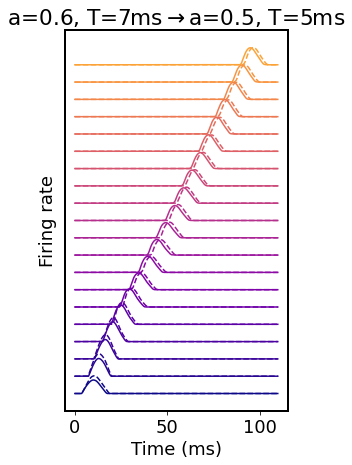

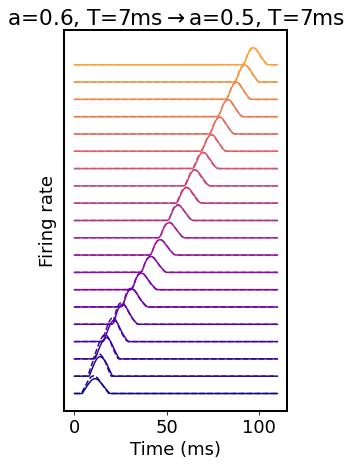

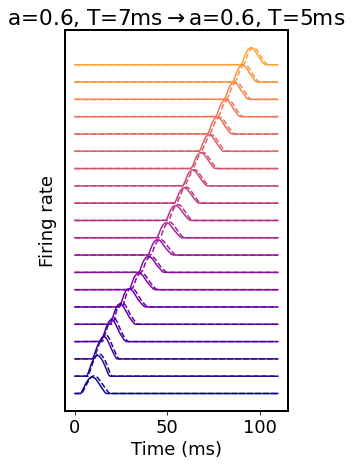

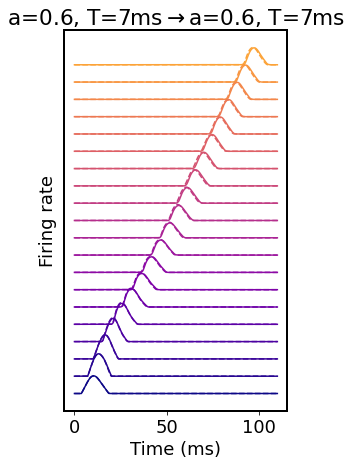

In [52]:
for idx_dir, dir_name in enumerate(sorted(glob.glob('./sims_out/2_moment_control_param_sweep_*SEED_2_*_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0.001_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_1_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_*'))):
    plot_activities(dir_name, idx_dir)

./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.5_T_F_0.005_2024-09-05_16:54:00.715026
0
a=0.5, T=5ms $\rightarrow$ a=0.5, T=5ms
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.5_T_F_0.007_2024-09-05_16:57:27.628316
1
a=0.5, T=5ms $\rightarrow$ a=0.5, T=7ms
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.6_T_F_0.005_2024-09-05_17:00:39.013511
2
a=0.5, T=5ms $\rightarrow$ a=0.6, T=5ms
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT

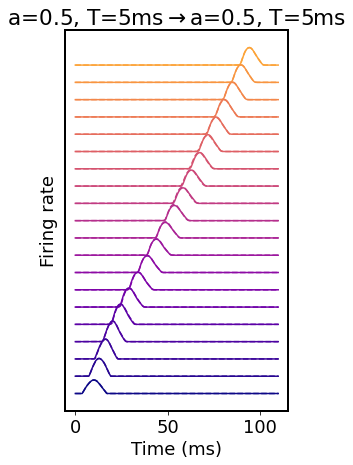

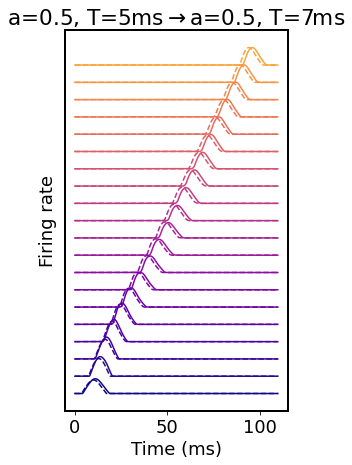

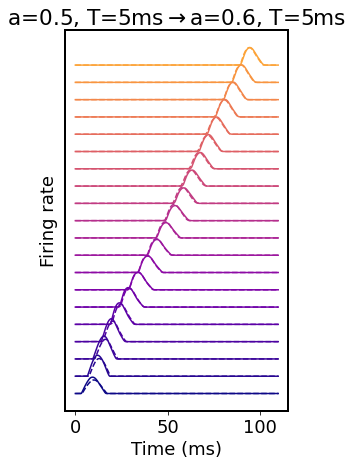

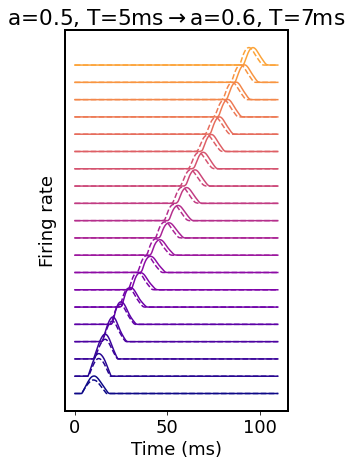

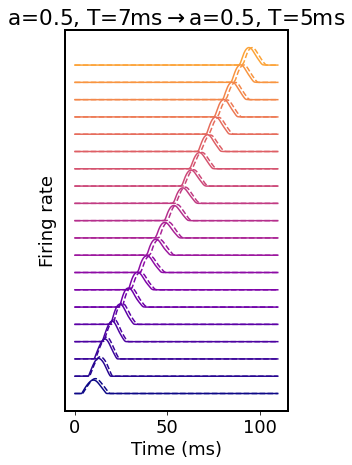

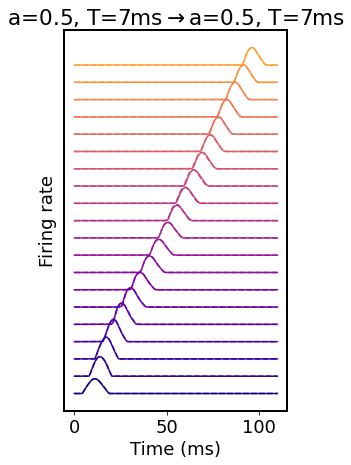

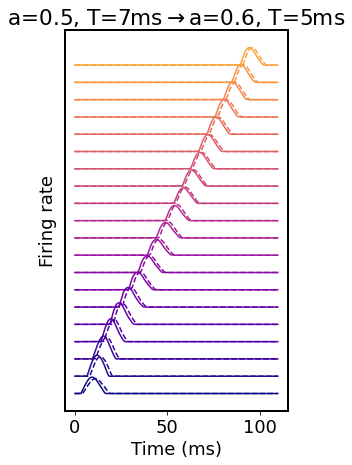

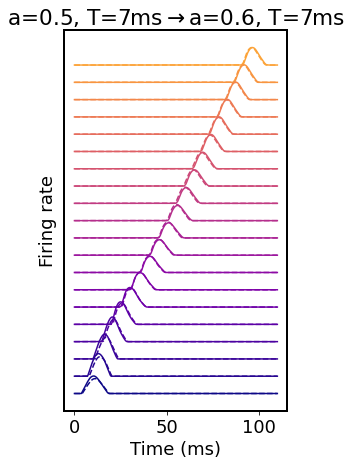

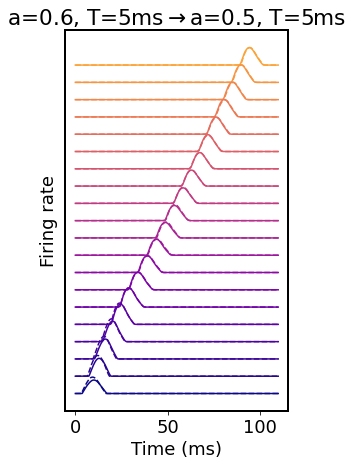

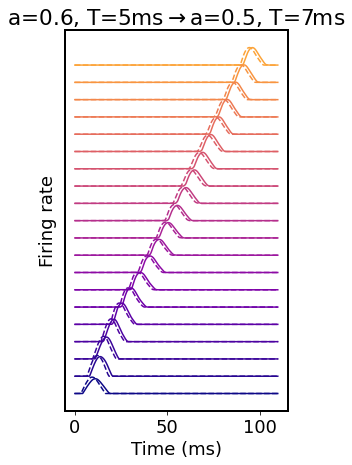

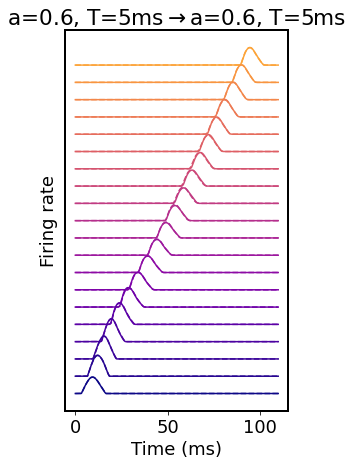

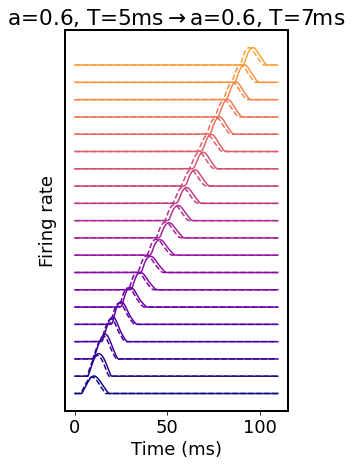

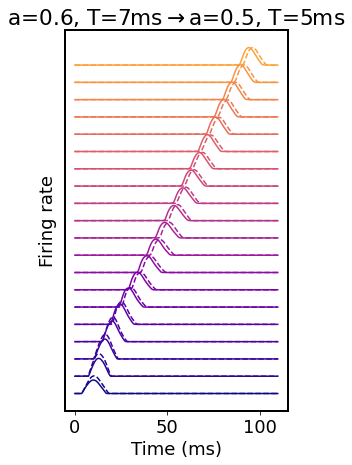

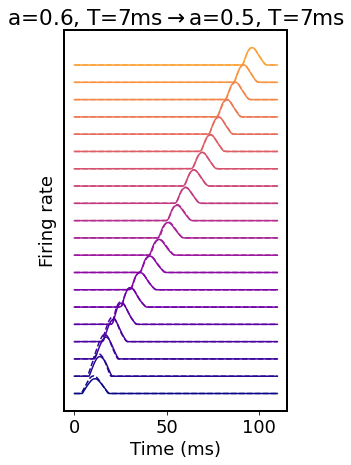

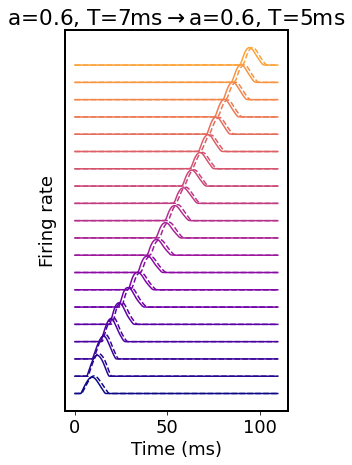

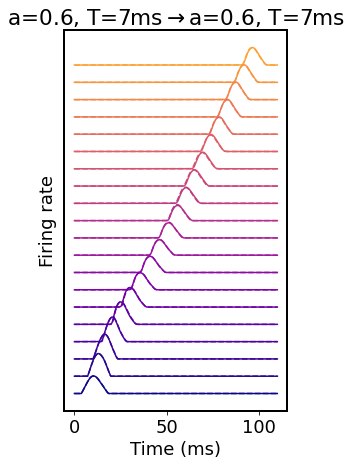

In [9]:
for idx_dir, dir_name in enumerate(sorted(glob.glob('./sims_out/2_moment_control_param_sweep_*SEED_2_*_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_*'))):
    plot_activities(dir_name, idx_dir)

./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_3_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.5_T_F_0.005_2024-09-05_17:26:18.207722
0
a=0.5, T=5ms $\rightarrow$ a=0.5, T=5ms
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_3_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.5_T_F_0.01_2024-09-05_17:29:29.438778
1
a=0.5, T=5ms $\rightarrow$ a=0.5, T=7ms
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_3_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_1_T_F_0.005_2024-09-05_17:32:52.327151
2
a=0.5, T=5ms $\rightarrow$ a=0.6, T=5ms
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_3_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.

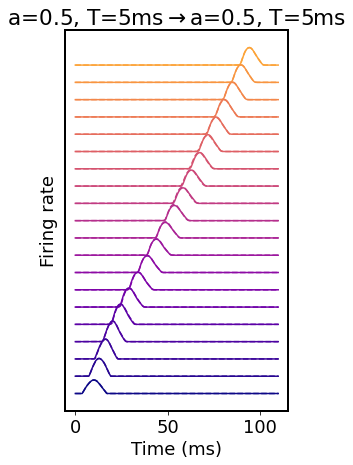

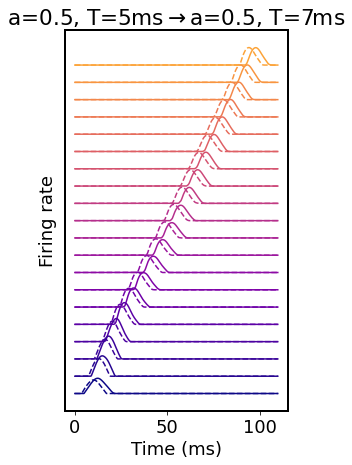

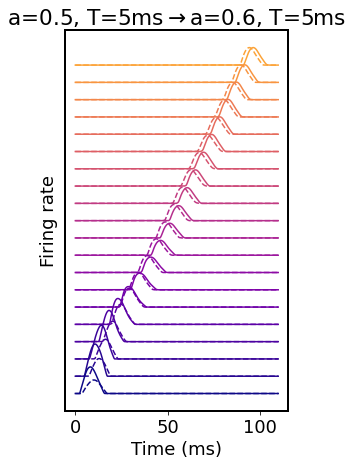

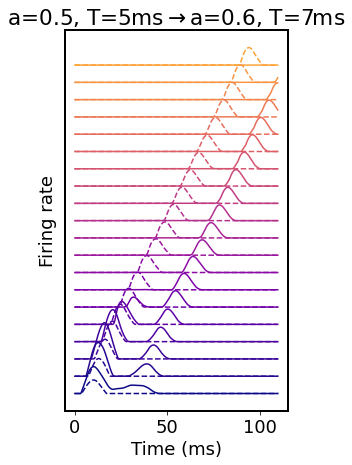

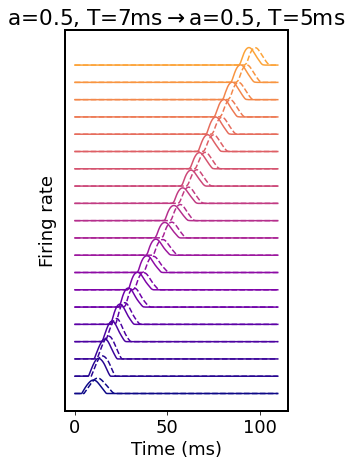

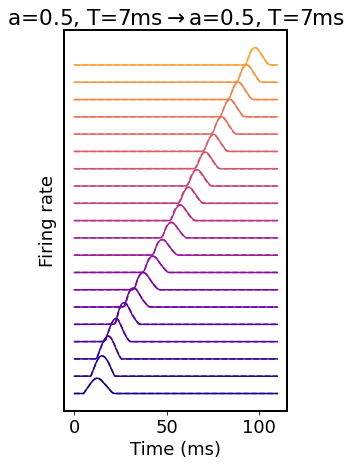

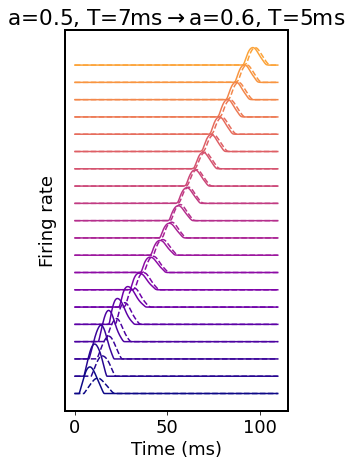

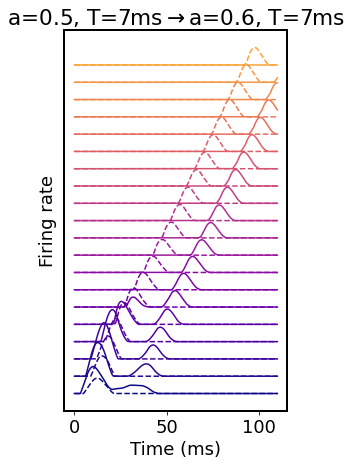

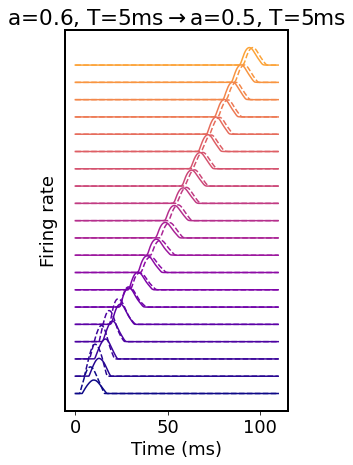

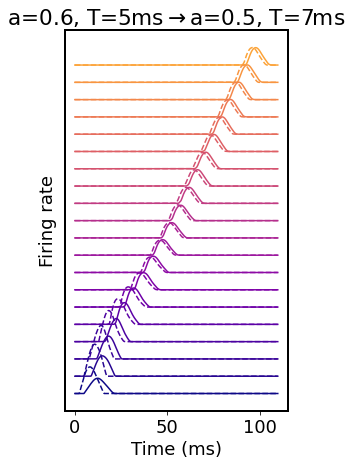

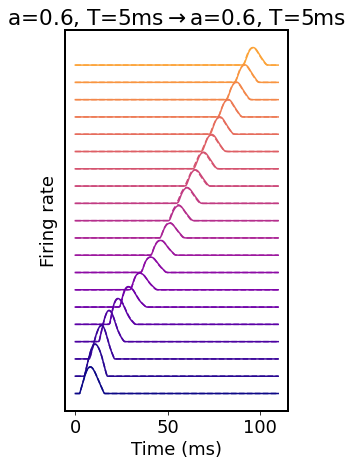

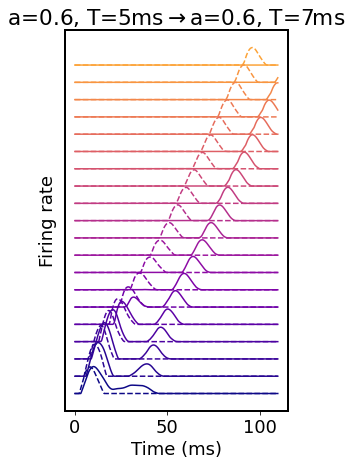

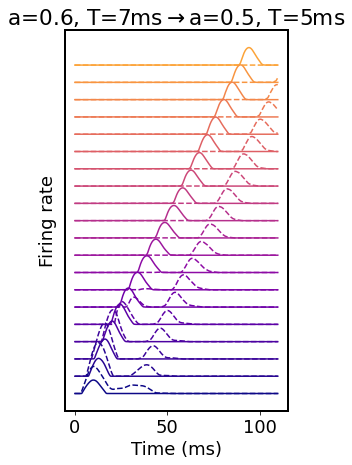

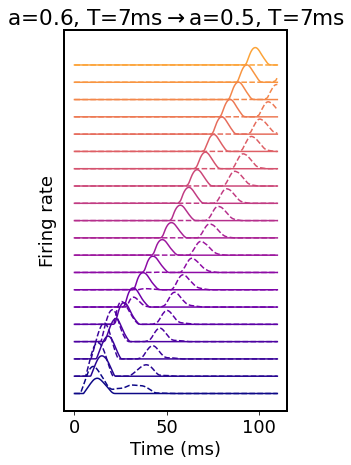

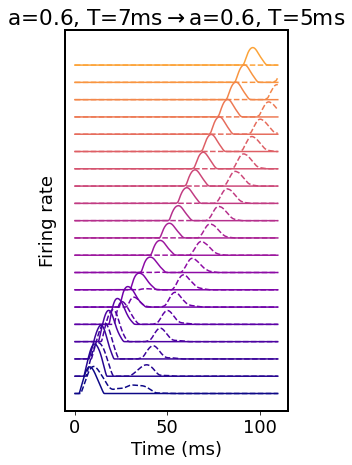

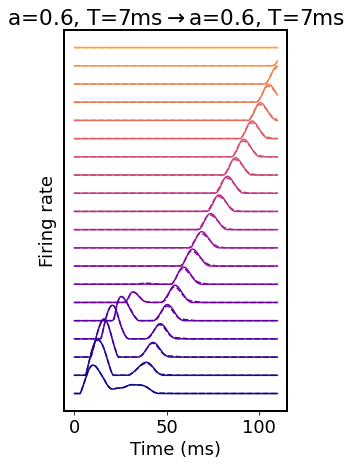

In [8]:
for idx_dir, dir_name in enumerate(sorted(glob.glob('./sims_out/2_moment_control_param_sweep_*SEED_3_*_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_*'))):
    plot_activities(dir_name, idx_dir)

./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_4_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.3_T_I_0.003_A_F_0.3_T_F_0.003_2024-09-06_11:21:15.460367
0
a=0.5, T=5ms $\rightarrow$ a=0.5, T=5ms
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_4_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.3_T_I_0.003_A_F_0.3_T_F_0.007_2024-09-06_11:25:05.337395
1
a=0.5, T=5ms $\rightarrow$ a=0.5, T=7ms
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_4_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.3_T_I_0.003_A_F_0.6_T_F_0.003_2024-09-06_11:28:49.232710
2
a=0.5, T=5ms $\rightarrow$ a=0.6, T=5ms
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_4_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT

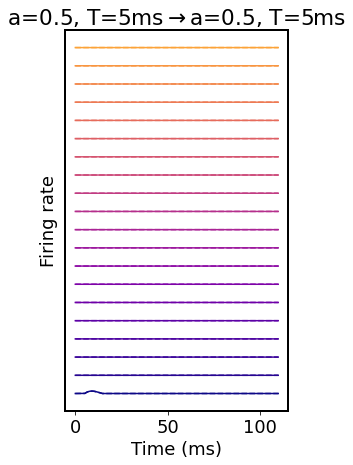

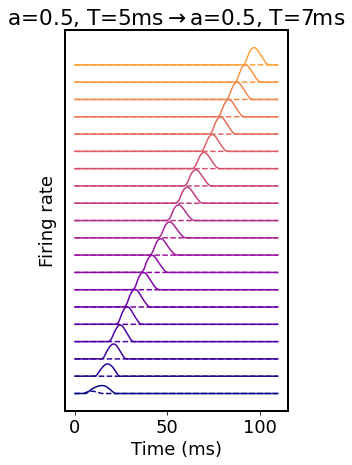

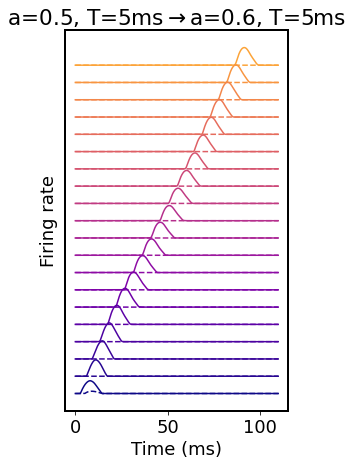

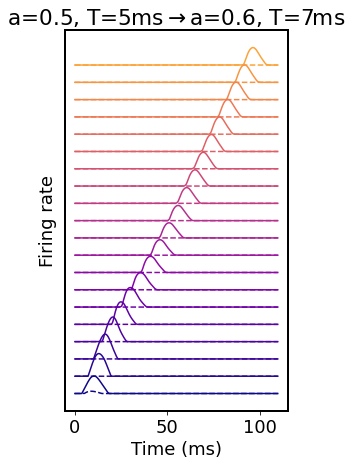

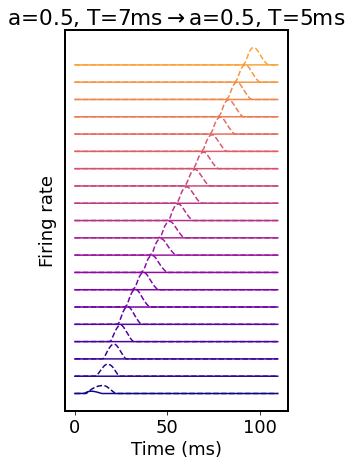

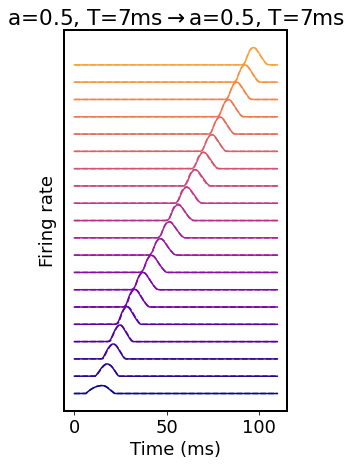

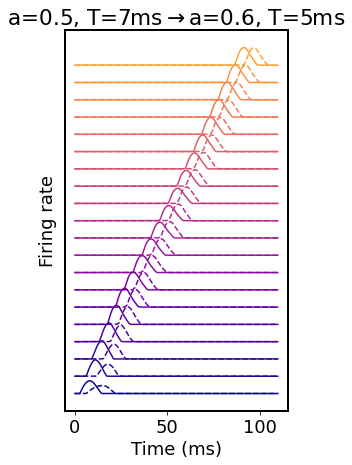

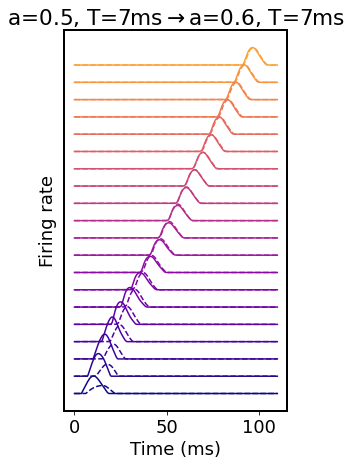

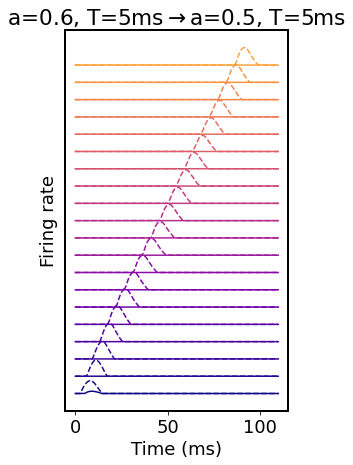

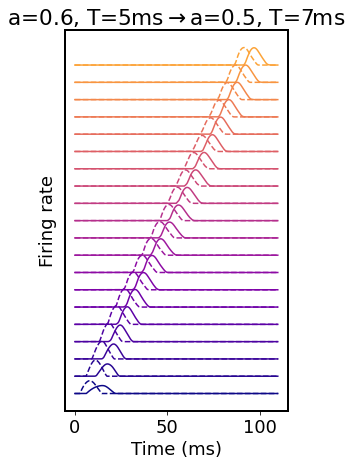

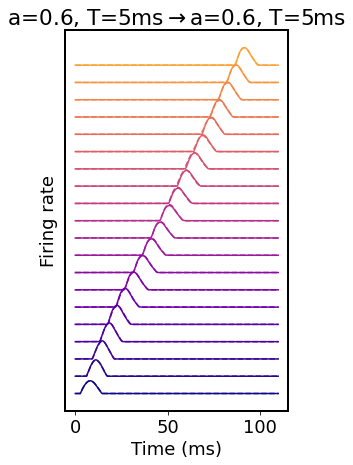

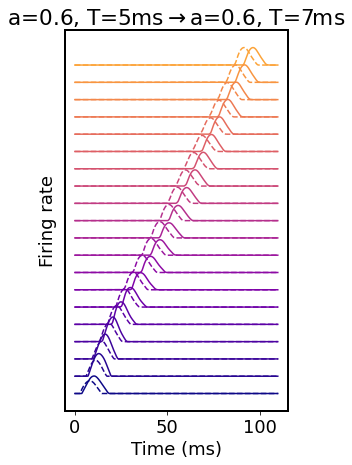

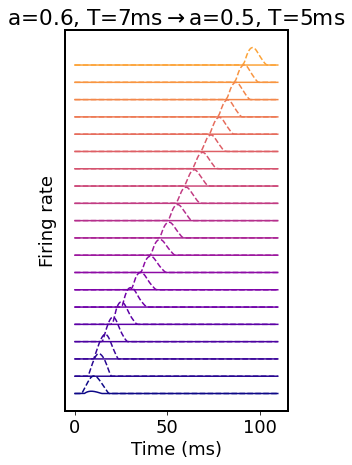

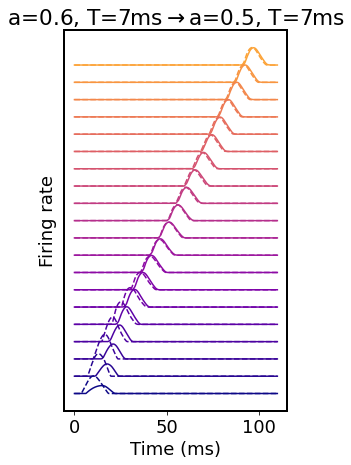

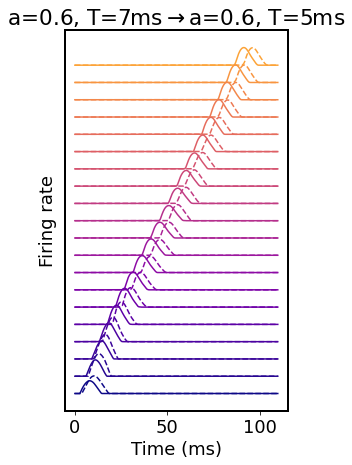

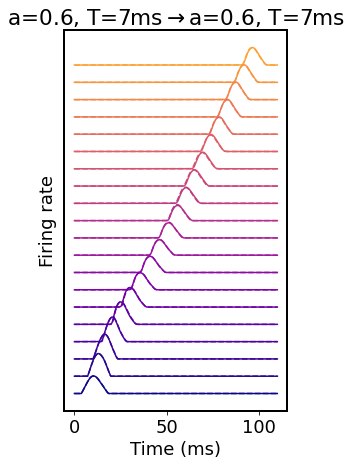

In [18]:
file_regex = './sims_out/2_moment_control_param_sweep_*SEED_4_*_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_*'
for idx_dir, dir_name in enumerate(sorted(glob.glob(file_regex))):
    plot_activities(dir_name, idx_dir)

./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_4_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.3_T_I_0.003_A_F_0.3_T_F_0.003_2024-09-06_13:48:22.261737
0
a=0.5, T=5ms $\rightarrow$ a=0.5, T=5ms
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_4_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.3_T_I_0.003_A_F_0.3_T_F_0.007_2024-09-06_13:52:29.136970
1
a=0.5, T=5ms $\rightarrow$ a=0.5, T=7ms
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_4_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.3_T_I_0.003_A_F_0.6_T_F_0.003_2024-09-06_13:56:52.966932
2
a=0.5, T=5ms $\rightarrow$ a=0.6, T=5ms
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_4_SYN_CHANGE_PROB_0_EXC_RULE_SE

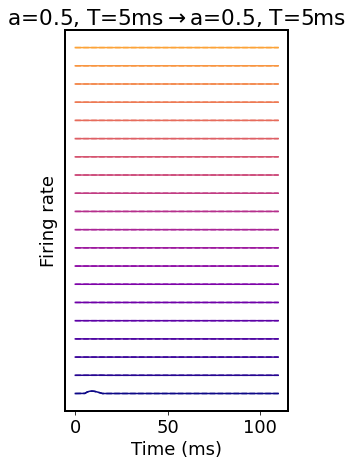

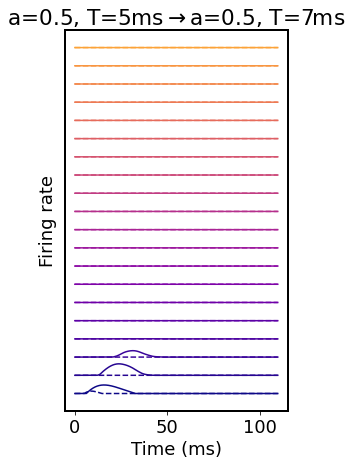

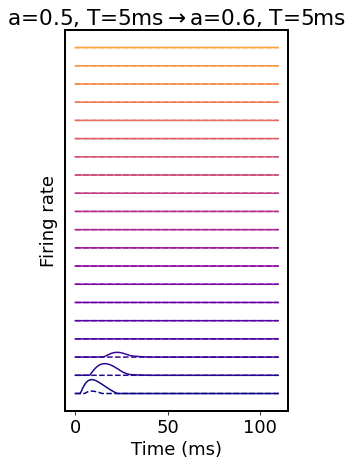

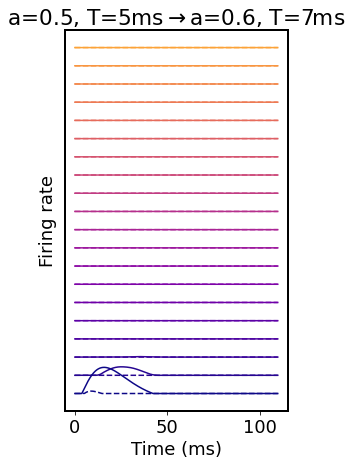

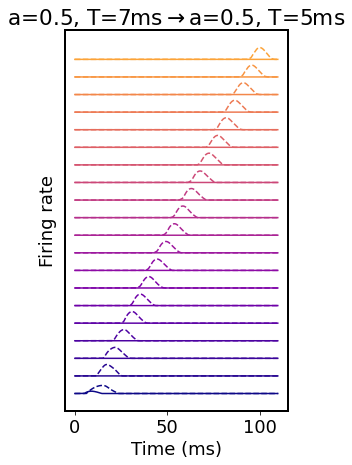

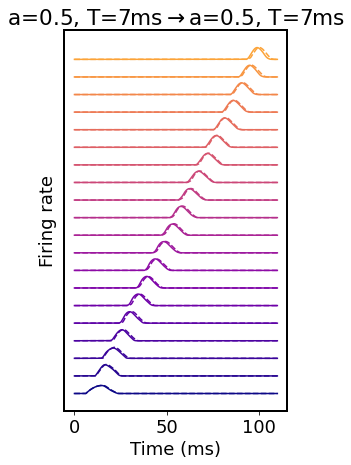

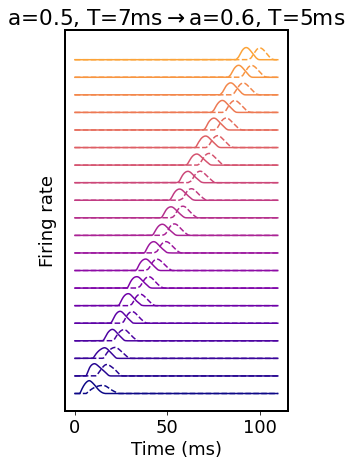

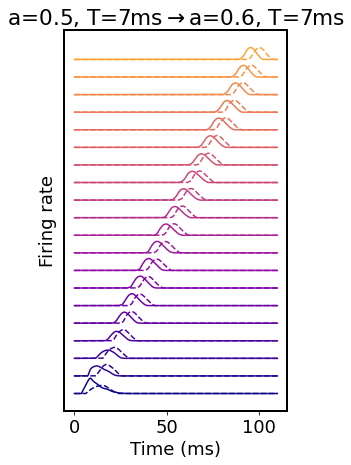

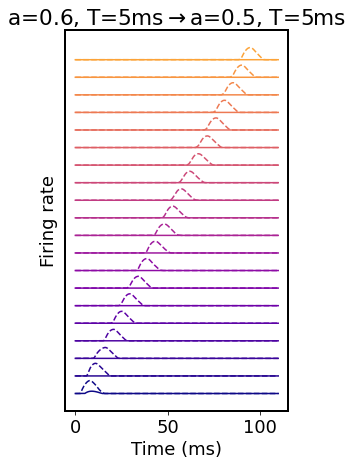

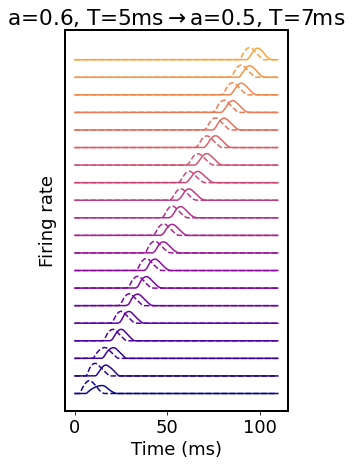

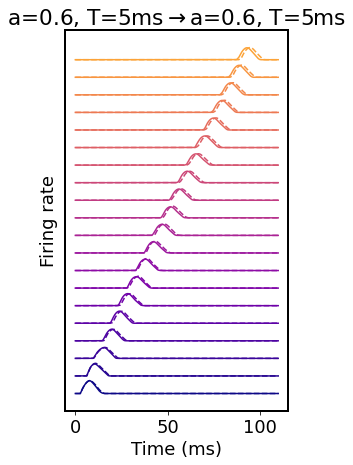

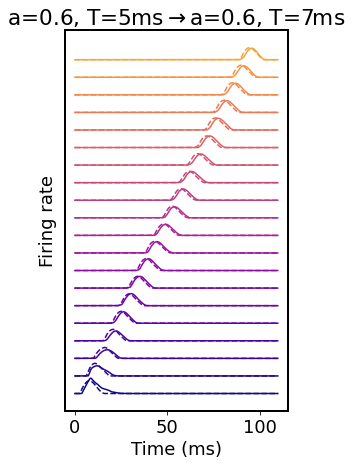

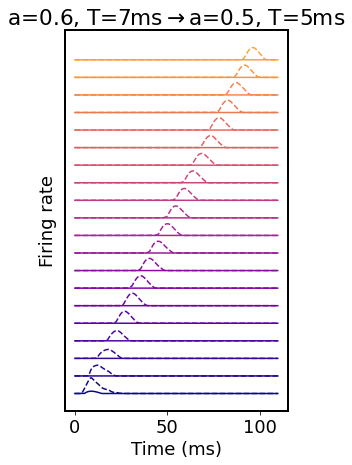

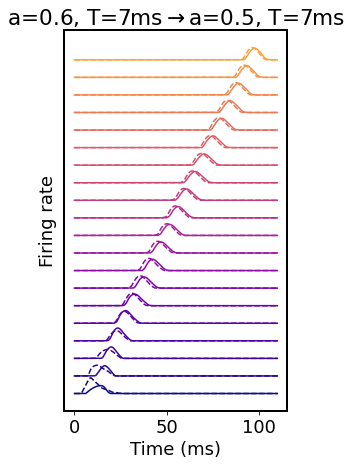

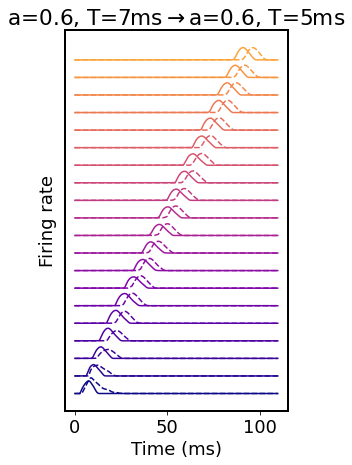

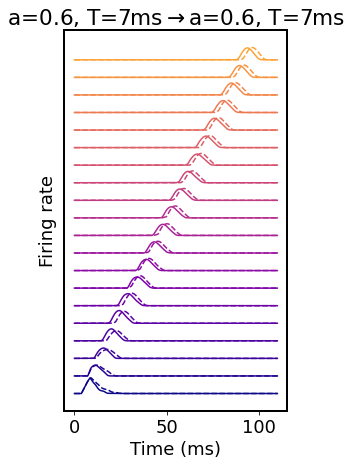

In [5]:
file_regex = './sims_out/2_moment_control_param_sweep_*SEED_4_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'
for idx_dir, dir_name in enumerate(sorted(glob.glob(file_regex))):
    plot_activities(dir_name, idx_dir)

./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_4_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.2_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.3_T_I_0.003_A_F_0.3_T_F_0.003_2024-09-06_13:35:54.341222
0
a=0.5, T=5ms $\rightarrow$ a=0.5, T=5ms
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_4_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.2_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.3_T_I_0.003_A_F_0.3_T_F_0.007_2024-09-06_13:39:39.274435
1
a=0.5, T=5ms $\rightarrow$ a=0.5, T=7ms
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_4_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.2_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_A_I_0.3_T_I_0.003_A_F_0.6_T_F_0.003_2024-09-06_13:43:23.959957
2
a=0.5, T=5ms $\rightarrow$ a=0.6, T=5ms
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_4_SYN_CHANGE_PROB_0_EXC_RULE_SE

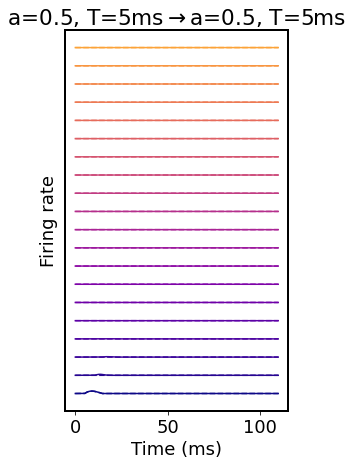

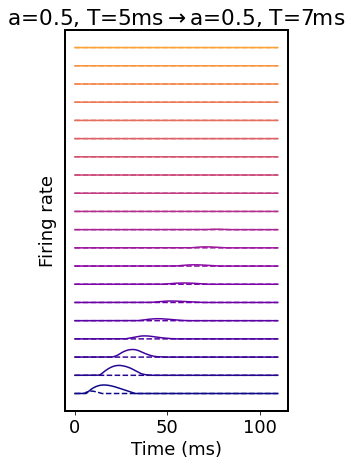

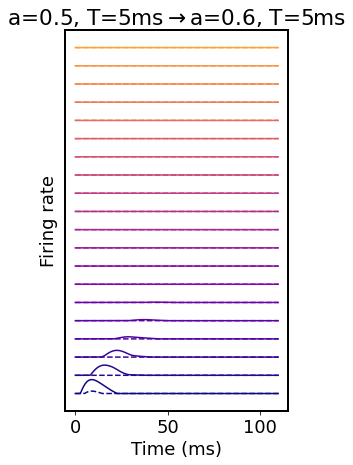

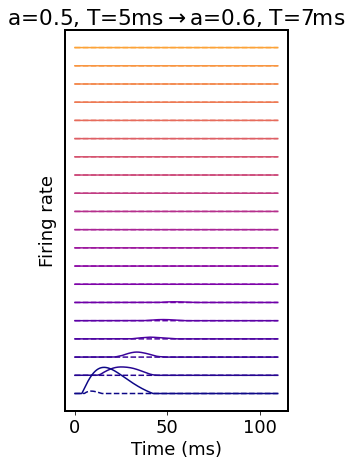

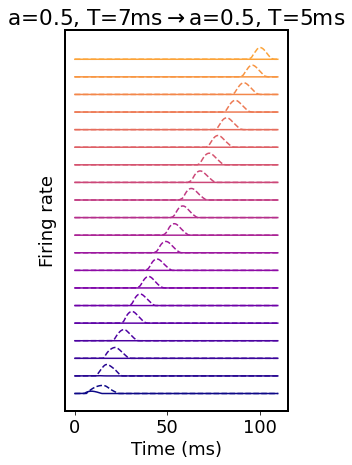

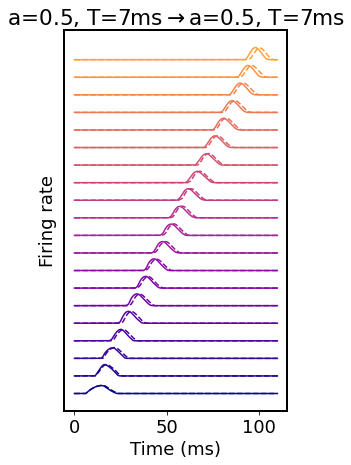

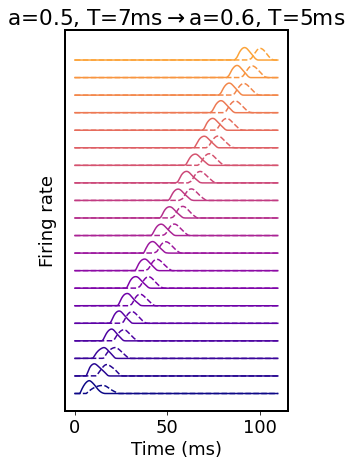

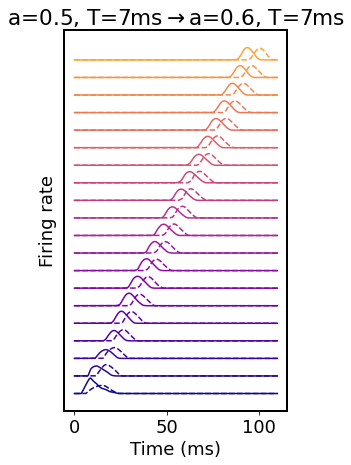

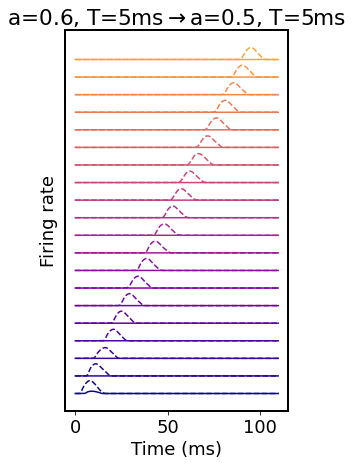

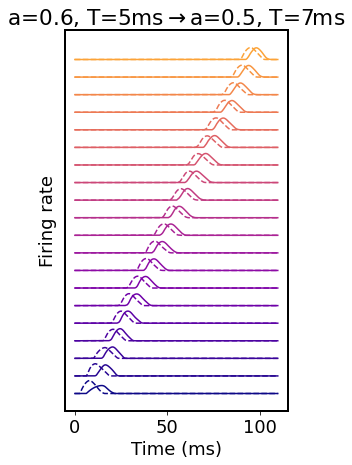

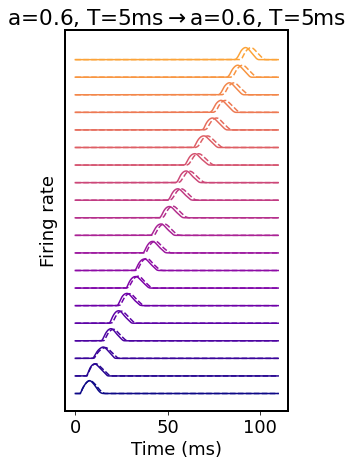

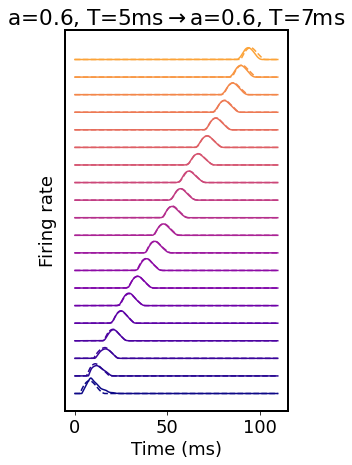

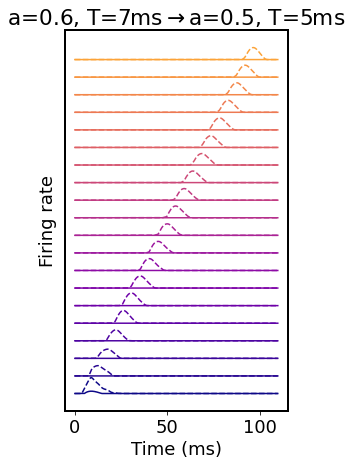

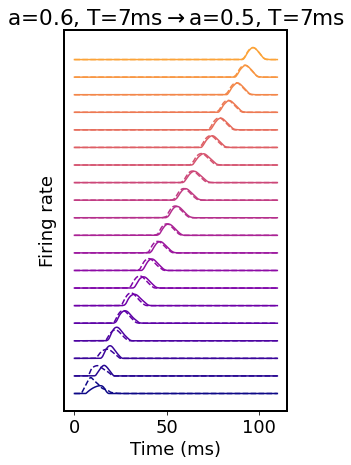

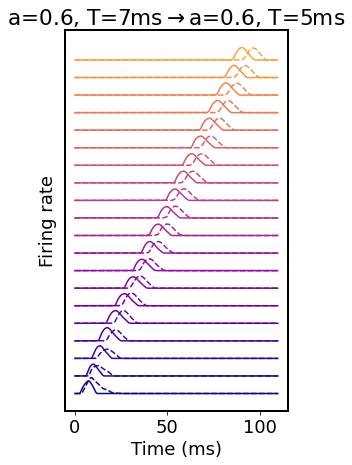

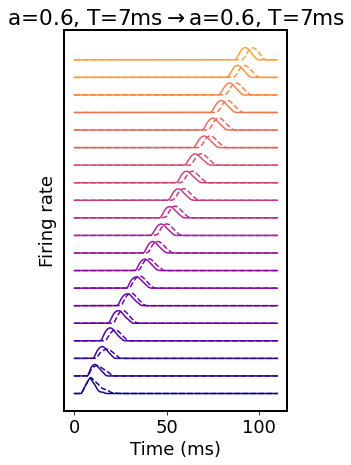

In [8]:
file_regex = './sims_out/2_moment_control_param_sweep_*SEED_4_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.2_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'
for idx_dir, dir_name in enumerate(sorted(glob.glob(file_regex))):
    plot_activities(dir_name, idx_dir)

./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_1_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.5_T_F_0.005_2024-09-04_14:41:06.490555
0
a=0.5, T=5ms $\rightarrow$ a=0.5, T=5ms
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_1_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.5_T_F_0.007_2024-09-04_14:45:25.744124
1
a=0.5, T=5ms $\rightarrow$ a=0.5, T=7ms
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_1_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_A_I_0.5_T_I_0.005_A_F_0.6_T_F_0.005_2024-09-04_14:49:46.888832
2
a=0.5, T=5ms $\rightarrow$ a=0.6, T=5ms
./sims_out/2_moment_control_param_sweep_INDEX_0__SEED_2_SYN_CHANGE_PROB_0_EXC_RULE_SE

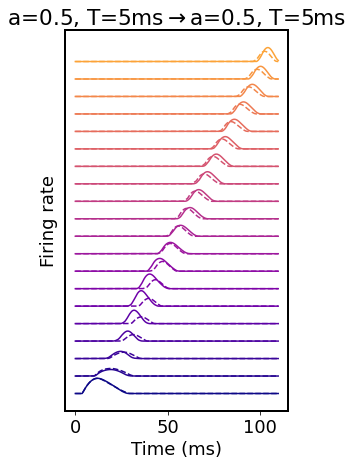

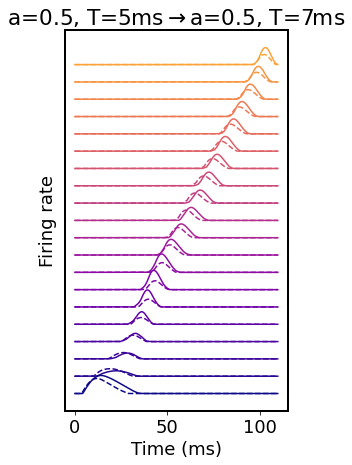

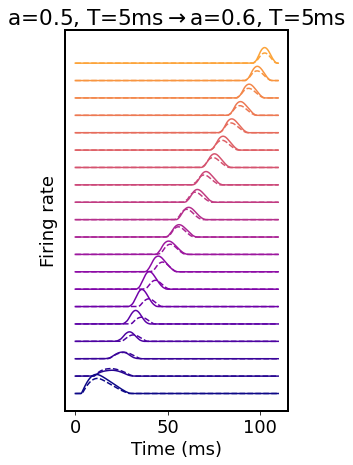

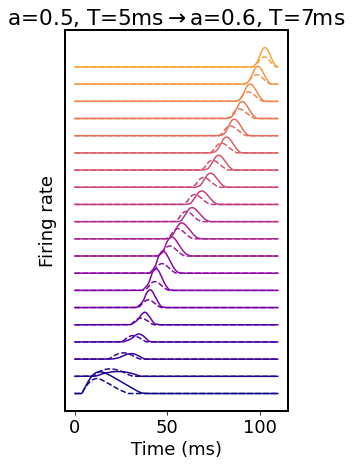

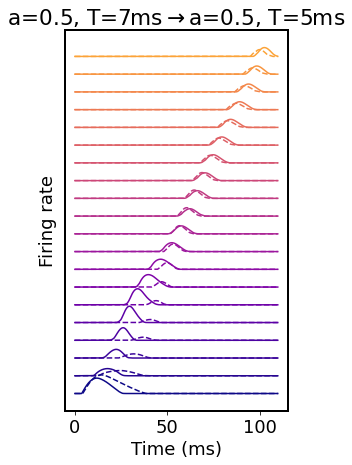

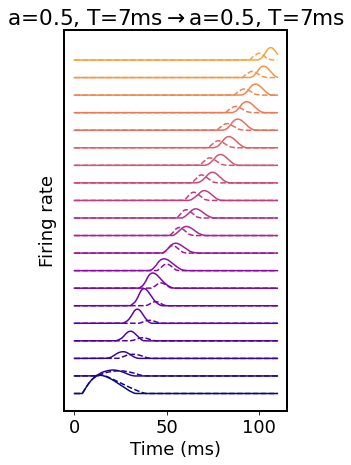

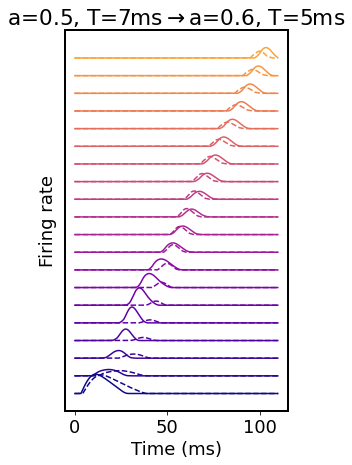

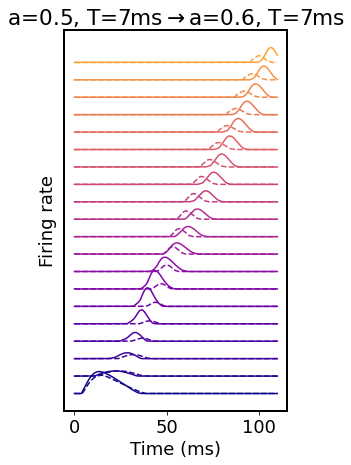

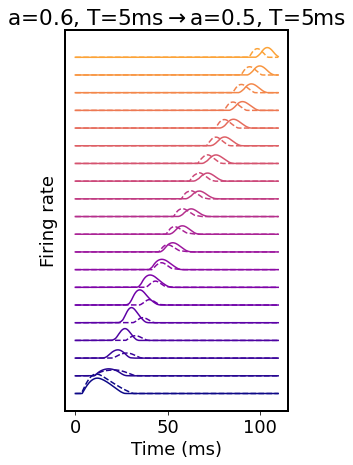

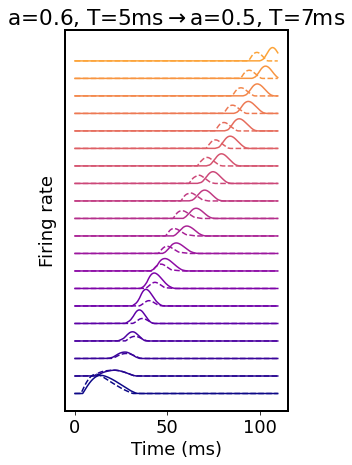

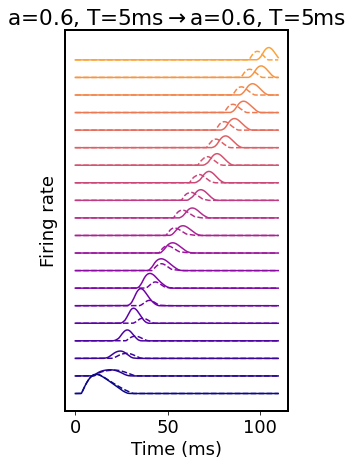

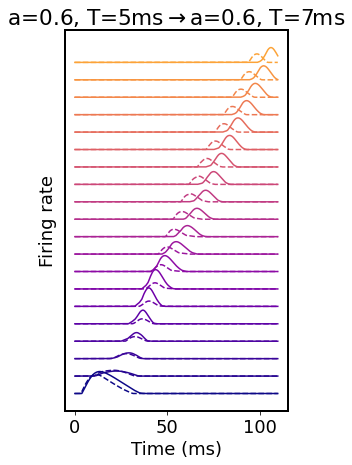

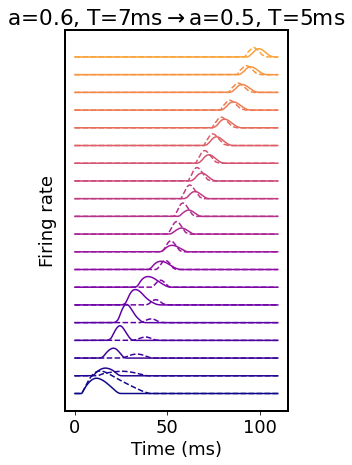

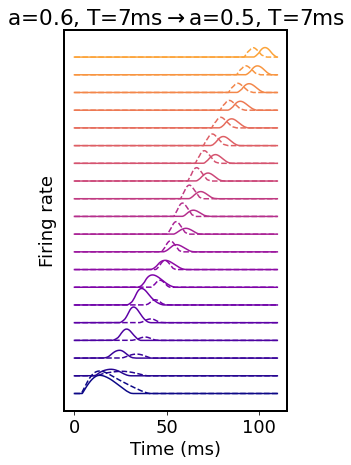

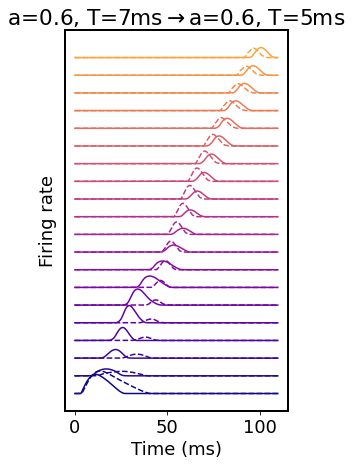

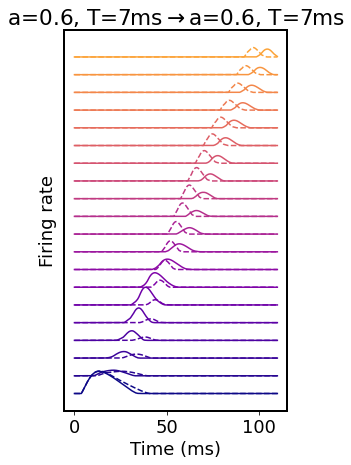

In [6]:
file_regex = './sims_out/2_moment_control_param_sweep*_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.03_EXC_M1_C_1_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_*'
for idx_dir, dir_name in enumerate(sorted(glob.glob(file_regex))):
    plot_activities(dir_name, idx_dir)